# Data modelling and model building

Building data models to predict pollution

## Data loading and preparation

In [72]:
import pandas as pd
# Load the data
data = pd.read_csv('../Combined data/combined_data_hourly_2023.csv')

data = data.iloc[:, :11].join(data[['Celle 11', 'Celle 12', 'Celle 16', 'Celle 17', 'Celle 18', 'Celle 22', 'Celle 23']])

# Remove the date column
data.drop(columns=['Date'], inplace=True)

# Rename columns to their relative position
data.rename(columns={'Celle 11': 'Traffic east', 'Celle 12': 'Traffic north-east', 'Celle 18': 'Traffic north-west',
                     'Celle 17': 'Traffic Hvidovre', 'Celle 23': 'Traffic west', 'Celle 22': 'Traffic south-west',
                     'Celle 16': 'Traffic south-east'}, inplace=True)

# Get the structure of the data
print(data.info())

# convert the 'Weekday' and 'Hour' Column to be categorical
data['Weekday'] = data['Weekday'].astype('category')
data['Hour'] = data['Hour'].astype('category')

print(data.head())

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 8758 entries, 0 to 8757
Data columns (total 17 columns):
 #   Column              Non-Null Count  Dtype  
---  ------              --------------  -----  
 0   Weekday             8758 non-null   object 
 1   Hour                8758 non-null   int64  
 2   NO2_ppb             8649 non-null   float64
 3   NOx_ppb             8497 non-null   float64
 4   Temp_dry            8757 non-null   float64
 5   Humidity            8757 non-null   float64
 6   wind_speed          8757 non-null   float64
 7   Pressure            8757 non-null   float64
 8   visibility          8758 non-null   float64
 9   Wind_dir            8757 non-null   float64
 10  Traffic east        8758 non-null   float64
 11  Traffic north-east  8758 non-null   float64
 12  Traffic south-east  8758 non-null   float64
 13  Traffic Hvidovre    8758 non-null   float64
 14  Traffic north-west  8758 non-null   float64
 15  Traffic south-west  8758 non-null   float64
 16  Traffi

In [73]:
# Ensure the 'Wind_dir' column is numeric before categorization
data['Wind_dir'] = pd.to_numeric(data['Wind_dir'], errors='coerce')
# Partition the wind_dir into 8 categories
def categorize_wind_dir(wind_dir):
    if wind_dir < 22.5 or wind_dir >= 337.5:
        return 'N'
    elif 22.5 <= wind_dir < 67.5:
        return 'NE'
    elif 67.5 <= wind_dir < 112.5:
        return 'E'
    elif 112.5 <= wind_dir < 157.5:
        return 'SE'
    elif 157.5 <= wind_dir < 202.5:
        return 'S'
    elif 202.5 <= wind_dir < 247.5:
        return 'SW'
    elif 247.5 <= wind_dir < 292.5:
        return 'W'
    else:
        return 'NW'

# Apply the function to the 'Wind_dir' column
data['Wind_dir'] = data['Wind_dir'].apply(categorize_wind_dir)

# Convert the 'Wind_dir' column to categorical
data['Wind_dir'] = data['Wind_dir'].astype('category')

In [74]:
# show the levels of the 'Weekday' column
print(data['Weekday'].cat.categories)
print(data['Hour'].cat.categories)
print(data['Wind_dir'].cat.categories)
data.describe()

Index(['Friday', 'Monday', 'Saturday', 'Sunday', 'Thursday', 'Tuesday',
       'Wednesday'],
      dtype='object')
Index([ 0,  1,  2,  3,  4,  5,  6,  7,  8,  9, 10, 11, 12, 13, 14, 15, 16, 17,
       18, 19, 20, 21, 22, 23],
      dtype='int64')
Index(['E', 'N', 'NE', 'NW', 'S', 'SE', 'SW', 'W'], dtype='object')


,NO2_ppb,NOx_ppb,Temp_dry,Humidity,wind_speed,Pressure,visibility,Traffic east,Traffic north-east,Traffic south-east,Traffic Hvidovre,Traffic north-west,Traffic south-west,Traffic west
count,8649.000000,8497.000000,8757.000000,8757.000000,8757.000000,8757.000000,8758.000000,8758.000000,8758.000000,8758.000000,8758.000000,8758.000000,8758.000000,8758.000000
mean,4.240136,5.212444,10.020416,77.146538,5.121321,1012.070007,39579.653269,12.649145,18.348691,9.544604,13.522538,16.436796,8.841485,10.464269
std,3.929058,6.871200,6.674464,14.628129,2.663858,12.049569,19987.508255,11.450062,16.583565,12.718775,14.229252,16.064491,6.377068,8.283016
min,0.020725,-0.076125,-6.650000,26.666667,0.000000,849.883333,50.000000,0.000000,0.000000,0.000000,0.000000,0.920000,0.920000,0.920000
25%,1.757351,2.076923,4.650000,68.333333,3.100000,1003.816667,24666.666667,3.950000,3.810000,2.150000,3.310000,4.820000,4.300000,4.770000
50%,3.018082,3.372438,9.200000,80.333333,4.766667,1012.916667,40833.333333,9.670000,12.880000,3.850000,8.670000,10.160000,7.160000,7.440000
75%,5.207296,5.761782,16.066667,88.500000,6.783333,1020.716667,55833.333333,15.440000,27.940000,10.220000,16.185000,19.740000,10.630000,13.820000
max,32.357715,93.195720,26.166667,100.000000,18.000000,1041.583333,75000.000000,61.760000,69.480000,60.660000,69.480000,66.170000,31.980000,43.010000


Missing values

Missing values count in each column:
Weekday                 0
Hour                    0
NO2_ppb               109
NOx_ppb               261
Temp_dry                1
Humidity                1
wind_speed              1
Pressure                1
visibility              0
Wind_dir                0
Traffic east            0
Traffic north-east      0
Traffic south-east      0
Traffic Hvidovre        0
Traffic north-west      0
Traffic south-west      0
Traffic west            0
dtype: int64


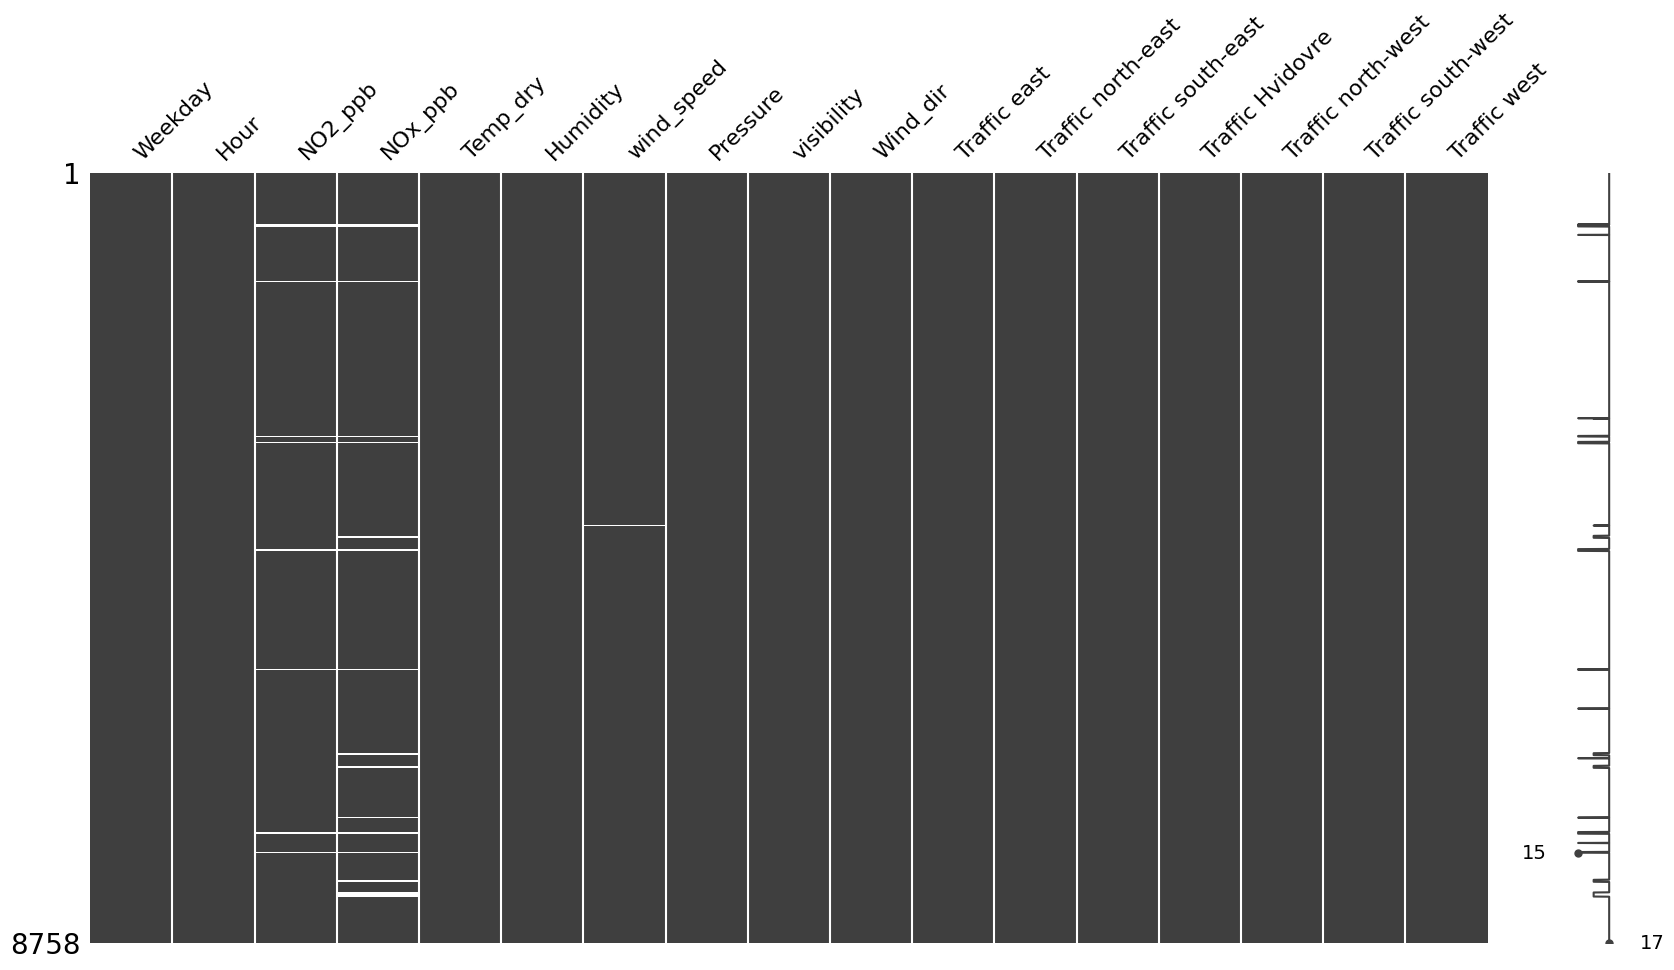

Data after dropping rows with missing values:
Weekday               0
Hour                  0
NO2_ppb               0
NOx_ppb               0
Temp_dry              0
Humidity              0
wind_speed            0
Pressure              0
visibility            0
Wind_dir              0
Traffic east          0
Traffic north-east    0
Traffic south-east    0
Traffic Hvidovre      0
Traffic north-west    0
Traffic south-west    0
Traffic west          0
dtype: int64


C:\Users\Jonas\AppData\Local\Temp\ipykernel_24204\1868761441.py:14: FutureWarning: A value is trying to be set on a copy of a DataFrame or Series through chained assignment using an inplace method.
The behavior will change in pandas 3.0. This inplace method will never work because the intermediate object on which we are setting values always behaves as a copy.

For example, when doing 'df[col].method(value, inplace=True)', try using 'df.method({col: value}, inplace=True)' or df[col] = df[col].method(value) instead, to perform the operation inplace on the original object.


  data['NO2_ppb'].fillna(data['NO2_ppb'].mean(), inplace=True)
C:\Users\Jonas\AppData\Local\Temp\ipykernel_24204\1868761441.py:15: FutureWarning: A value is trying to be set on a copy of a DataFrame or Series through chained assignment using an inplace method.
The behavior will change in pandas 3.0. This inplace method will never work because the intermediate object on which we are setting values always behaves as a 

In [75]:
# Count rows with missing values
missing_values_count = data.isnull().sum()
print("Missing values count in each column:")
print(missing_values_count)

# Visualize the missing data
import missingno as msno
import matplotlib.pyplot as plt

msno.matrix(data, figsize=(20, 10))
plt.show()

# Impute the mean for missing values of numerical columns (the following code can be optimized)
data['NO2_ppb'].fillna(data['NO2_ppb'].mean(), inplace=True)
data['NOx_ppb'].fillna(data['NOx_ppb'].mean(), inplace=True)
data['Temp_dry'].fillna(data['Temp_dry'].mean(), inplace=True)
data['wind_speed'].fillna(data['wind_speed'].mean(), inplace=True)
data['Pressure'].fillna(data['Pressure'].mean(), inplace=True)
data['visibility'].fillna(data['visibility'].mean(), inplace=True)
data['Humidity'].fillna(data['Humidity'].mean(), inplace=True)
#data.dropna(inplace=True)

missing_values_count = data.isnull().sum()
print("Data after dropping rows with missing values:")
print(missing_values_count)

# Consider using KNN to impute missing values instead.

In [76]:
# Transform the categorical variables into dummy variables
data = pd.get_dummies(data, drop_first=True)
print(data.head())

    NO2_ppb    NOx_ppb   Temp_dry   Humidity  wind_speed     Pressure  \
0  9.609539  14.333718   8.083333  98.500000    5.600000  1000.050000   
1  2.431203   2.601390   9.516667  97.500000    6.600000   999.616667   
2  1.794863   1.888760  10.200000  95.000000   10.633333   999.666667   
3  1.286549   1.169177  10.033333  95.666667   10.300000   999.866667   
4  1.020709   0.850521  10.166667  95.000000   10.300000  1000.300000   

    visibility  Traffic east  Traffic north-east  Traffic south-east  ...  \
0  3600.000000          3.73                8.40                0.93  ...   
1  4250.000000          1.87                5.60                0.93  ...   
2  4550.000000          0.93                3.73                0.93  ...   
3  3566.666667          0.00                2.80                0.00  ...   
4  3650.000000          0.00                0.93                0.00  ...   

   Hour_21  Hour_22  Hour_23  Wind_dir_N  Wind_dir_NE  Wind_dir_NW  \
0    False    False    False

Splitting into training and testing set.

In [77]:
# X and Y. X should be all variables except NO2_ppb, and Y should be NO2_ppb
X = data.drop(columns=['NO2_ppb', 'NOx_ppb'])
y = data['NO2_ppb']

# Split the data into training and testing sets
split_index = int(len(X) * 0.8)

# Chronological split, which is possible as the data is already in order
X_train, X_test = X.iloc[:split_index], X.iloc[split_index:]
y_train, y_test = y.iloc[:split_index], y.iloc[split_index:]

Data visualization

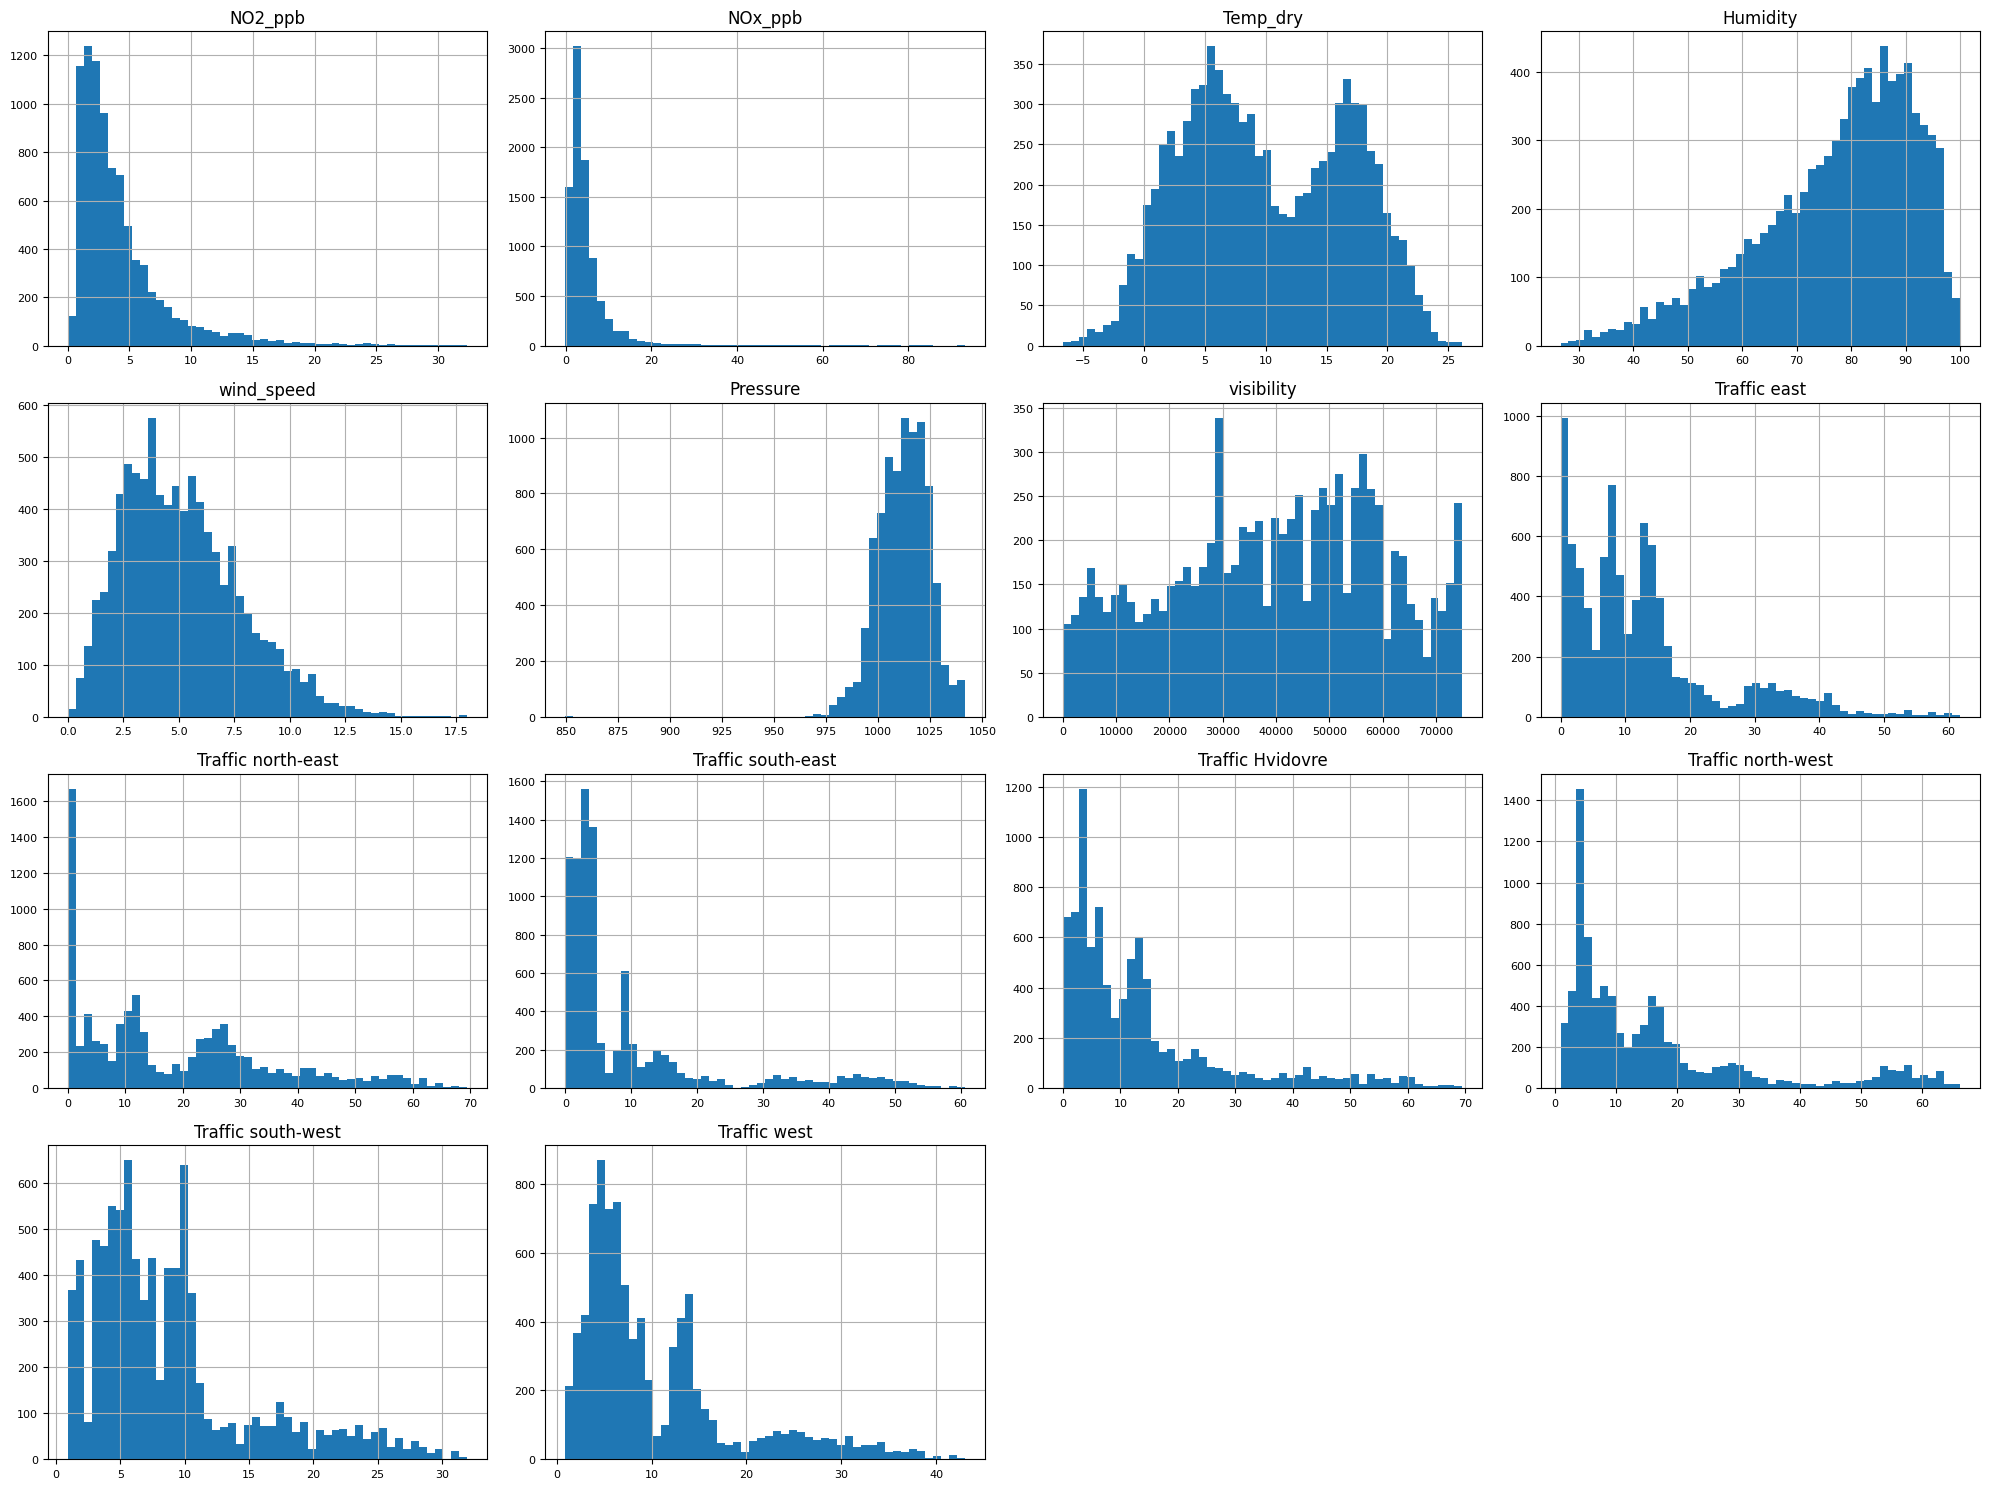

In [15]:
# Visualize the numeric data with histograms
data.hist(figsize=(20, 15), bins=50, xlabelsize=8, ylabelsize=8)
plt.tight_layout()

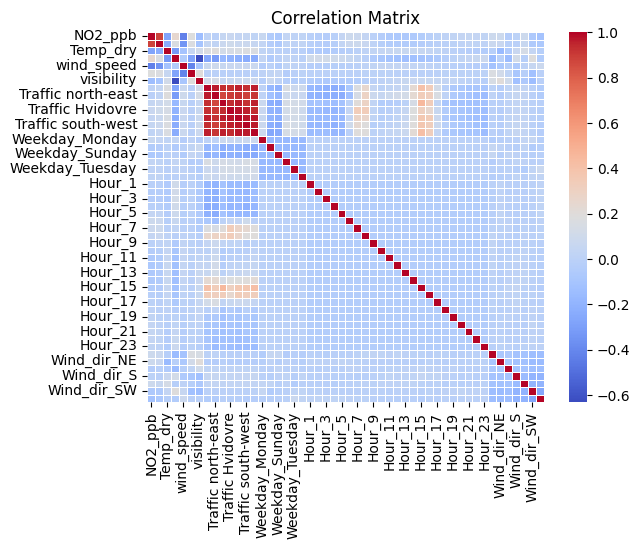

In [16]:
import seaborn as sns
# Compute the correlation matrix
correlation_matrix = data.corr()

# Plot the correlation matrix as a heatmap
sns.heatmap(correlation_matrix, annot=False, cmap='coolwarm', fmt='.2f', linewidths=0.5)
plt.title("Correlation Matrix")
plt.show()

As it can be seen, there are a lot of multicollinearity to be found among the different traffic variables, which can prove to be a problem for the final model.

## Modelling

### Linear regression

In [79]:
from sklearn.linear_model import LinearRegression    # Requires package scikit-learn
from sklearn.model_selection import train_test_split
from sklearn.metrics import mean_squared_error, mean_absolute_error

# Create and train the linear regression model
model = LinearRegression()
model.fit(X_train, y_train)

# Make predictions
y_pred = model.predict(X_test)

# Evaluate the model
mae = mean_absolute_error(y_test, y_pred)
mse = mean_squared_error(y_test, y_pred)
print(f"Mean Squared Error: {mse}")
print(f"Mean absolute Error: {mae}")

import statsmodels.api as sm

# Add a constant to the model (intercept)
X_train_const = sm.add_constant(X_train)

# Fit the model using statsmodels
ols_model = sm.OLS(y_train, X_train_const.astype(float)).fit()

# Print the coefficients and their p-values
print(ols_model.summary())

Mean Squared Error: 9.221375944414435
Mean absolute Error: 2.0006295918204806
                            OLS Regression Results                            
Dep. Variable:                NO2_ppb   R-squared:                       0.393
Model:                            OLS   Adj. R-squared:                  0.389
Method:                 Least Squares   F-statistic:                     93.97
Date:                 ma, 19 maj 2025   Prob (F-statistic):               0.00
Time:                        11:37:09   Log-Likelihood:                -17718.
No. Observations:                7006   AIC:                         3.553e+04
Df Residuals:                    6957   BIC:                         3.587e+04
Df Model:                          48                                         
Covariance Type:            nonrobust                                         
                         coef    std err          t      P>|t|      [0.025      0.975]
---------------------------------------------

### Linear Stepwise Regression

### KNN

In [80]:
from sklearn.pipeline import Pipeline
from sklearn.neighbors import KNeighborsRegressor
from sklearn.preprocessing import StandardScaler
from sklearn.model_selection import GridSearchCV
from sklearn.metrics import mean_squared_error, r2_score, mean_absolute_error

# Scaling + defining KNN model
knn_pipeline = Pipeline([
    ('scaler', StandardScaler()),  
    ('knn', KNeighborsRegressor())
])

# Define hyperparameter grid
param_grid = {
    'knn__n_neighbors': list(range(1, 51))  # test k = 1 to 50
}

# Grid search with cross-validation (use TimeSeriesSplit if you want)
grid_search = GridSearchCV(
    knn_pipeline,
    param_grid,
    cv=5,
    scoring='neg_mean_squared_error',
    n_jobs=-1
)

# Fit on training data
grid_search.fit(X_train, y_train)

# Best model
best_model = grid_search.best_estimator_

# Predict on test set
y_pred = best_model.predict(X_test)

# Evaluate
mae = mean_absolute_error(y_test, y_pred)
mse = mean_squared_error(y_test, y_pred)
r2 = r2_score(y_test, y_pred)

print("Best k:", grid_search.best_params_['knn__n_neighbors'])
print(f"Test MSE: {mse:.2f}")
print(f"Test MAE: {mae:.2f}")

Best k: 24
Test MSE: 13.57
Test MAE: 2.26


### PLS

Fitting 10 folds for each of 48 candidates, totalling 480 fits
Best n_components: 12
    n_components  mean_test_score  mean_test_mse
11            12         -9.35063        9.35063


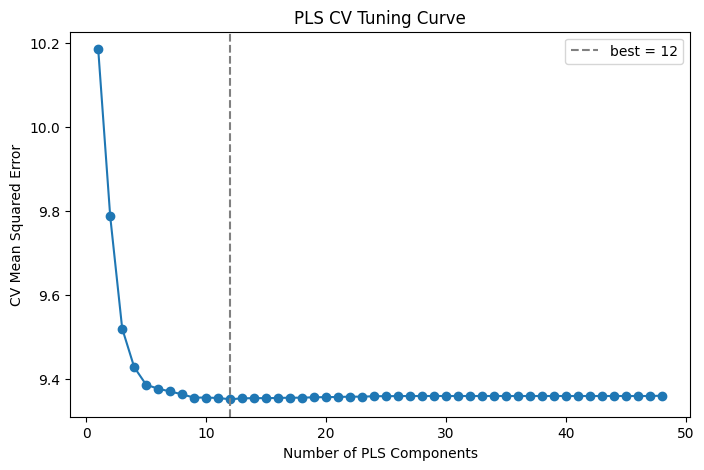

PLS Regression MSE:  9.2110
PLS Regression MAE:  2.0003


In [81]:
import numpy as np
import pandas as pd
from sklearn.pipeline import Pipeline
from sklearn.preprocessing import StandardScaler
from sklearn.cross_decomposition import PLSRegression
from sklearn.model_selection import GridSearchCV, KFold
from sklearn.metrics import mean_squared_error, mean_absolute_error

#Fixed seed
np.random.seed(123)

#Build a pipeline: scale → PLS
pipe = Pipeline([
    ("scaler", StandardScaler()),
    ("pls",    PLSRegression())
])

#Param grid: tune n_components from 1 up to 100
#(Caret’s tuneLength = 100)
max_comps = min(100, X_train.shape[1])
param_grid = {
    "pls__n_components": list(range(1, max_comps + 1))
}

#10-fold CV with shuffling+seed to mimic trainControl(method="cv", number=10)
cv = KFold(n_splits=10, shuffle=True, random_state=123)

grid = GridSearchCV(
    estimator=pipe,
    param_grid=param_grid,
    scoring="neg_mean_squared_error",
    cv=cv,
    n_jobs=-1,
    verbose=1
)

# 6) Fit
grid.fit(X_train, y_train)

# 7) Best number of components
best_n = grid.best_params_["pls__n_components"]
print("Best n_components:", best_n)

# 8) Tabulate the MSE for each n_components
#    caret’s PLS$results → grid.cv_results_
results = pd.DataFrame(grid.cv_results_)
results = results[["param_pls__n_components", "mean_test_score"]].copy()
results["mean_test_mse"] = -results["mean_test_score"]
results = results.rename(columns={"param_pls__n_components": "n_components"})
print(results[results.n_components == best_n])

# 9) Plot test-set MSE vs n_components
import matplotlib.pyplot as plt

plt.figure(figsize=(8, 5))
plt.plot(results.n_components, results.mean_test_mse, marker="o")
plt.axvline(best_n, color="gray", linestyle="--", label=f"best = {best_n}")
plt.xlabel("Number of PLS Components")
plt.ylabel("CV Mean Squared Error")
plt.title("PLS CV Tuning Curve")
plt.legend()
plt.show()

#Extracting the best pipeline
best_pls = grid.best_estimator_
y_pred_pls = best_pls.predict(X_test)

#MSE result on the test set
pls_mse  = mean_squared_error(y_test, y_pred_pls)
pls_mae = mean_absolute_error(y_test, y_pred_pls)

print(f"PLS Regression MSE:  {pls_mse:.4f}")
print(f"PLS Regression MAE:  {pls_mae:.4f}")

### SVM

In [82]:
from sklearn.svm import SVR
from sklearn.metrics import mean_squared_error, mean_absolute_error

# Create the SVM regression model
svm_model = SVR(kernel='rbf', C=1.0, epsilon=0.1)

# Train the model
svm_model.fit(X_train, y_train)

# Make predictions
svm_y_pred = svm_model.predict(X_test)

# Evaluate the model
svm_mse = mean_squared_error(y_test, svm_y_pred)
print(f"SVM Regression Mean Squared Error: {svm_mse}")
svm_mae = mean_absolute_error(y_test, svm_y_pred)
print(f"SVM Regression Mean absolute Error: {svm_mae}")

SVM Regression Mean Squared Error: 18.392474696155407
SVM Regression Mean absolute Error: 2.5925189682857464


### Random forrest

In [12]:
from sklearn.ensemble import RandomForestRegressor
from sklearn.metrics import mean_squared_error

# Create the Random Forest model
rf_model = RandomForestRegressor(n_estimators=100, max_depth=None, random_state=42)

# Train the model
rf_model.fit(X_train, y_train)

# Make predictions
rf_y_pred = rf_model.predict(X_test)

# Evaluate the model
rf_mse = mean_squared_error(y_test, rf_y_pred)
print(f"Random Forest Mean Squared Error: {rf_mse}")

Random Forest Mean Squared Error: 8.343084463929678


### Random forest with parameter tuning

In [17]:
import numpy as np
from sklearn.ensemble import RandomForestRegressor, ExtraTreesRegressor
from sklearn.model_selection import GridSearchCV, KFold

#*Note: The models are quite large due to the expansive grid search (Takes about 30 min to run ATM)

#Setting up training data
n_features = X_train.shape[1]

#mtry grid
mtry_grid = [
    int(np.floor(n_features * p))
    for p in [0.05, 0.10, 0.15, 0.25, 0.30,
              0.35, 0.40, 0.45, 0.50, 0.55,
              0.60, 0.65, 0.70, 0.75, 0.80, 0.85]
]

#Rest of parameter grid
param_grid = {
    "max_features":   mtry_grid,
    "min_samples_leaf": list(range(1, 21)) #Min nodes from R called leafs here
}

#10-fold CV control (shuffled for extra randomness):
cv = KFold(n_splits=10, shuffle=True, random_state=123)

#There follows two models, just pick the one with the lowest CV validated MSE and test that model on the test set

# ——————————————
# A) “variance” splitrule → RandomForestRegressor
# ——————————————
rf = RandomForestRegressor(
    criterion="squared_error",
    random_state=123,
    n_jobs=-1
)
rf_search = GridSearchCV(
    rf,
    param_grid,
    cv=cv,
    verbose=1,
    n_jobs=-1,
    scoring="neg_mean_squared_error"
)
rf_search.fit(X_train, y_train)

print("RF (variance) best params:", rf_search.best_params_)
print("RF CV MSE:", -rf_search.best_score_)

# ————————————————————
# B) “extratrees” splitrule → ExtraTreesRegressor
# ————————————————————
et = ExtraTreesRegressor(
    random_state=123,
    n_jobs=-1
)
et_search = GridSearchCV(
    et,
    param_grid,
    cv=cv,
    verbose=1,
    n_jobs=-1,
    scoring="neg_mean_squared_error"
)
et_search.fit(X_train, y_train)

print("ET (extratrees) best params:", et_search.best_params_)
print("ET CV MSE:", -et_search.best_score_)

Fitting 10 folds for each of 320 candidates, totalling 3200 fits
RF (variance) best params: {'max_features': 19, 'min_samples_leaf': 1}
RF CV MSE: 5.130862166733775
Fitting 10 folds for each of 320 candidates, totalling 3200 fits
ET (extratrees) best params: {'max_features': 31, 'min_samples_leaf': 1}
ET CV MSE: 4.847461235184476


In [18]:
#Import mean_squared_error:
from sklearn.metrics import mean_squared_error


Random Forest Mean Squared Error: 7.7941771068734305
Random Forest (extra trees) Mean Squared Error: 7.918979853345744
Random Forest Mean Absolute Error: 1.708
Extra Trees Mean Absolute Error: 1.707


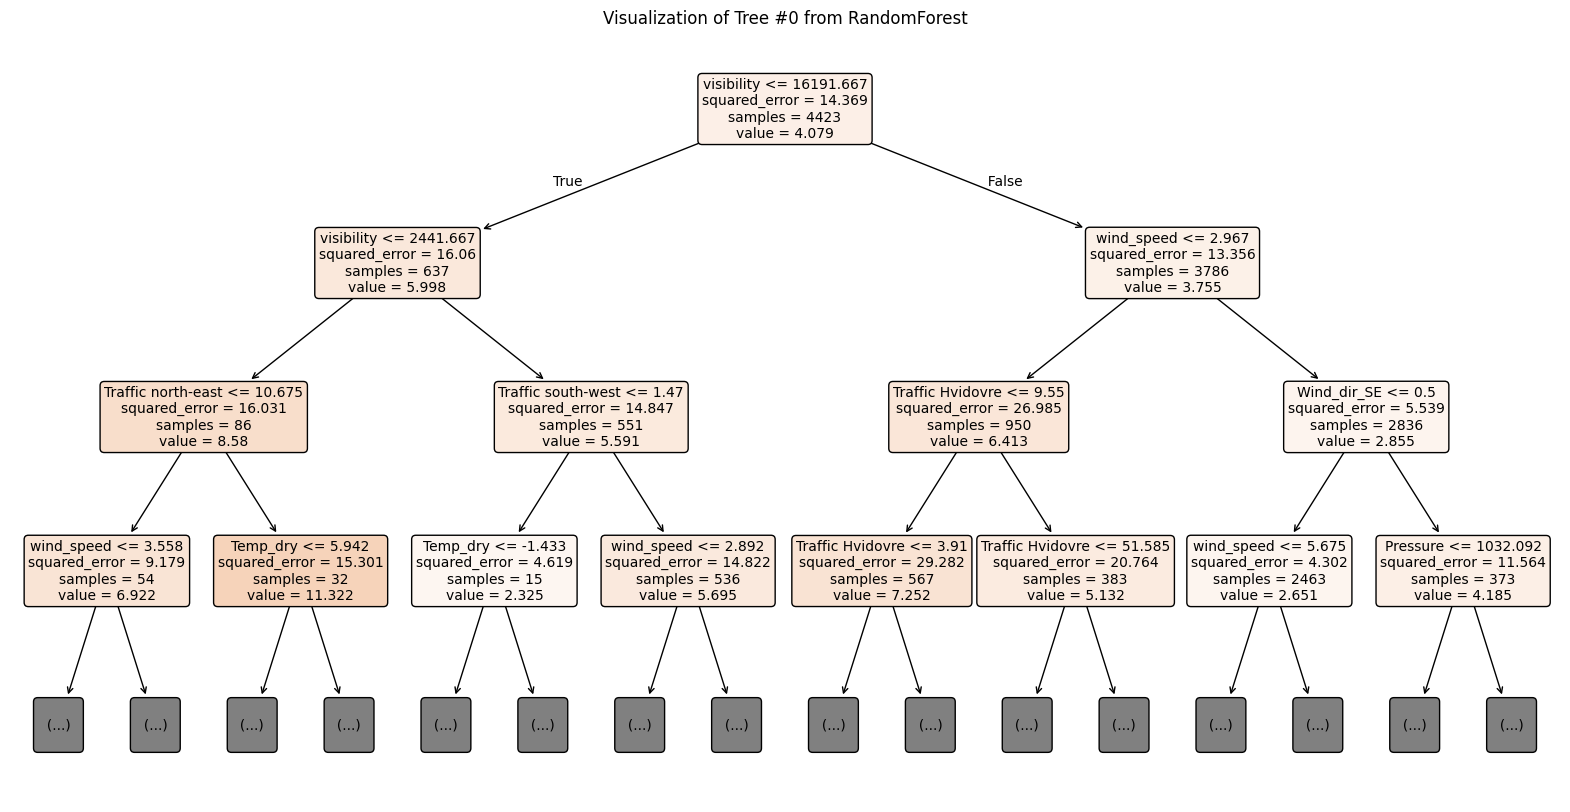

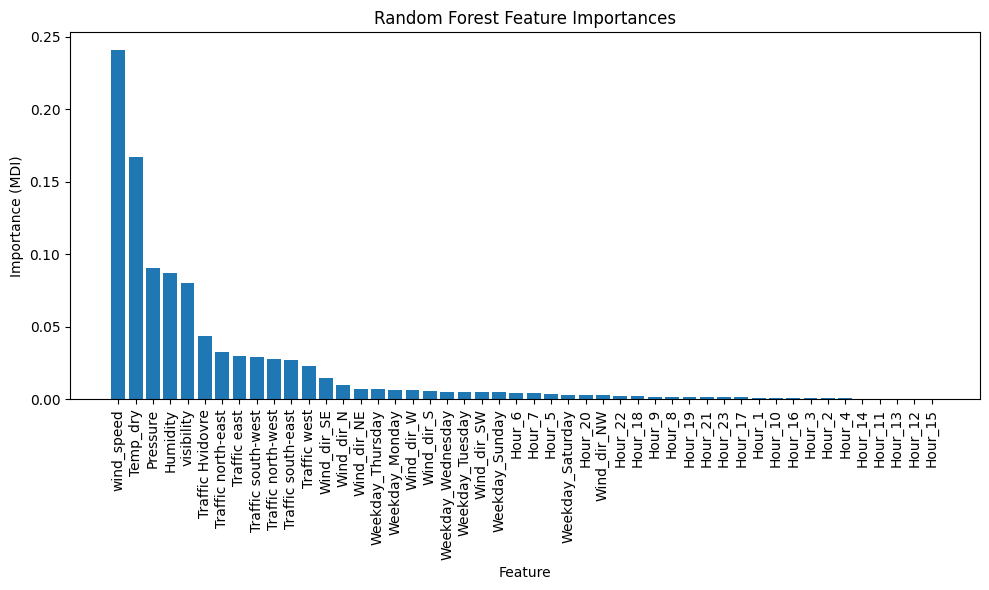

In [57]:
#Rf best
RF_best_model = rf_search.best_estimator_
RF_pred = RF_best_model.predict(X_test)

RF_mse = mean_squared_error(y_test, RF_pred)
print(f"Random Forest Mean Squared Error: {RF_mse}")

#ET best
ET_best_model = et_search.best_estimator_
ET_pred = ET_best_model.predict(X_test)

ET_mse = mean_squared_error(y_test, ET_pred)
print(f"Random Forest (extra trees) Mean Squared Error: {ET_mse}")


from sklearn.metrics import mean_absolute_error

# RF MAE
RF_mae = mean_absolute_error(y_test, RF_pred)
print(f"Random Forest Mean Absolute Error: {RF_mae:.3f}")

# ET MAE (if you want the extra‐trees too)
ET_mae = mean_absolute_error(y_test, ET_pred)
print(f"Extra Trees Mean Absolute Error: {ET_mae:.3f}")

#Plotting single decision tree from the best RF model
from sklearn.tree import plot_tree
import matplotlib.pyplot as plt

single_tree = RF_best_model.estimators_[0]

plt.figure(figsize=(20, 10))

plot_tree(
    single_tree,
    feature_names=X_train.columns,  
    filled=True,
    rounded=True,
    max_depth=3,                   
    fontsize=10
)

plt.title("Visualization of Tree #0 from RandomForest")
plt.show()

#Variable importance of the RF model
import numpy as np
import matplotlib.pyplot as plt

# Extract importances and feature names
importances = RF_best_model.feature_importances_
feature_names = X_train.columns 

# Sort by importance (descending)
indices = np.argsort(importances)[::-1]
sorted_importances = importances[indices]
sorted_features    = feature_names[indices]

plt.figure(figsize=(10, 6))
plt.title("Random Forest Feature Importances")
plt.bar(
    range(len(sorted_importances)),
    sorted_importances,
    align="center"
)
plt.xticks(
    range(len(sorted_importances)),
    sorted_features,
    rotation=90
)
plt.xlabel("Feature")
plt.ylabel("Importance (MDI)")
plt.tight_layout()
plt.show()

C:\Users\Jonas\AppData\Local\Temp\ipykernel_24204\4087239042.py:3: FutureWarning: 'H' is deprecated and will be removed in a future version, please use 'h' instead.
  dates = pd.date_range(start=manual_start_date, periods=len(y_test), freq='H')


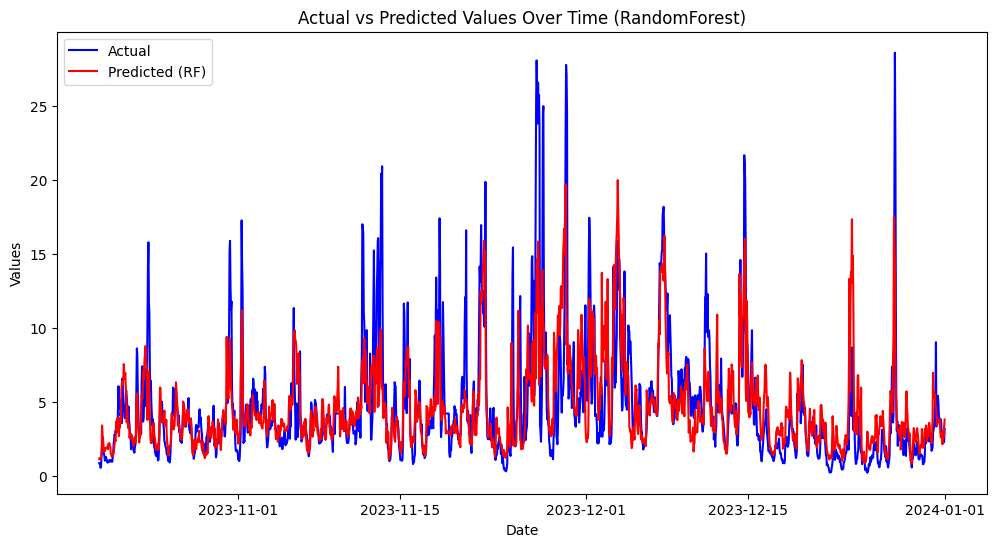

In [20]:
# Plotting Actual vs Predicted values for RandomForest
manual_start_date = '2023-10-20 00:00'  #Start of test set
dates = pd.date_range(start=manual_start_date, periods=len(y_test), freq='H')

plt.figure(figsize=(12, 6))
plt.plot(dates, y_test, label='Actual', color='blue')
plt.plot(dates, RF_pred, label='Predicted (RF)', color='red')
plt.title('Actual vs Predicted Values Over Time (RandomForest)')
plt.xlabel('Date')
plt.ylabel('Values')
plt.legend()
plt.show()

### Forecasting with RF

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 648 entries, 0 to 647
Data columns (total 15 columns):
 #   Column              Non-Null Count  Dtype  
---  ------              --------------  -----  
 0   Weekday             648 non-null    object 
 1   Hour                648 non-null    int64  
 2   Temp_dry            648 non-null    float64
 3   Humidity            648 non-null    int64  
 4   wind_speed          648 non-null    float64
 5   Pressure            648 non-null    float64
 6   visibility          648 non-null    int64  
 7   Wind_dir            648 non-null    int64  
 8   Traffic east        648 non-null    float64
 9   Traffic north-east  648 non-null    float64
 10  Traffic south-east  648 non-null    float64
 11  Traffic Hvidovre    648 non-null    float64
 12  Traffic north-west  648 non-null    float64
 13  Traffic south-west  648 non-null    float64
 14  Traffic west        648 non-null    float64
dtypes: float64(10), int64(4), object(1)
memory usage: 76.1+ K

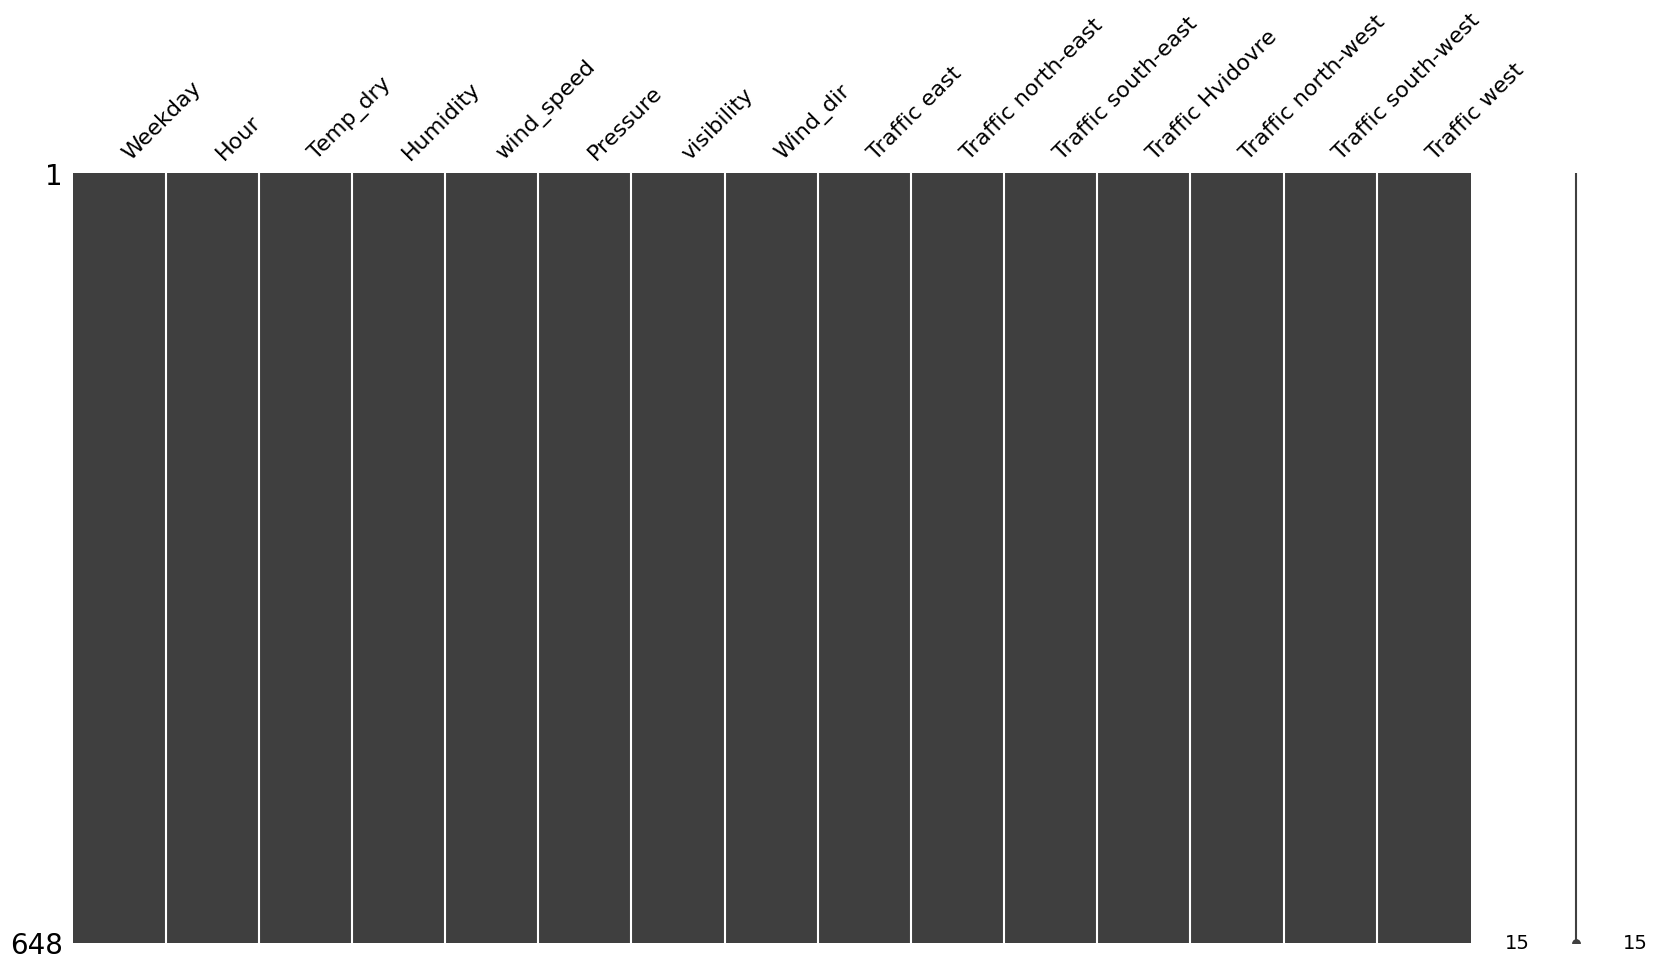

Data after dropping rows with missing values:
Weekday               0
Hour                  0
Temp_dry              0
Humidity              0
wind_speed            0
Pressure              0
visibility            0
Wind_dir              0
Traffic east          0
Traffic north-east    0
Traffic south-east    0
Traffic Hvidovre      0
Traffic north-west    0
Traffic south-west    0
Traffic west          0
dtype: int64
   Temp_dry  Humidity  wind_speed  Pressure  visibility  Traffic east  \
0      13.0        72         6.1    1021.5       26540      3.391251   
1      12.2        78         4.0    1021.9       21420      2.543438   
2      11.8        71         1.4    1021.9       12680      2.543438   
3      11.4        65         1.1    1022.1        4420      1.695626   
4      11.0        71         2.5    1021.9        1440      0.000000   

   Traffic north-east  Traffic south-east  Traffic Hvidovre  \
0            0.847813            2.543438          2.543438   
1            0.0

C:\Users\Jonas\AppData\Local\Temp\ipykernel_24204\1774284752.py:67: FutureWarning: A value is trying to be set on a copy of a DataFrame or Series through chained assignment using an inplace method.
The behavior will change in pandas 3.0. This inplace method will never work because the intermediate object on which we are setting values always behaves as a copy.

For example, when doing 'df[col].method(value, inplace=True)', try using 'df.method({col: value}, inplace=True)' or df[col] = df[col].method(value) instead, to perform the operation inplace on the original object.


  data2['Temp_dry'].fillna(data2['Temp_dry'].mean(), inplace=True)
C:\Users\Jonas\AppData\Local\Temp\ipykernel_24204\1774284752.py:68: FutureWarning: A value is trying to be set on a copy of a DataFrame or Series through chained assignment using an inplace method.
The behavior will change in pandas 3.0. This inplace method will never work because the intermediate object on which we are setting values always behaves a

In [21]:
#DATA PREP
import pandas as pd
# Load the data
data2 = pd.read_excel('../Combined data/Forecast May 2025.xlsx')

data2 = data2.iloc[:, :9].join(data2[['Celle 11', 'Celle 12', 'Celle 16', 'Celle 17', 'Celle 18', 'Celle 22', 'Celle 23']])

# Remove the date column
data2.drop(columns=['Date'], inplace=True)

# Rename columns to their relative position
data2.rename(columns={'Celle 11': 'Traffic east', 'Celle 12': 'Traffic north-east', 'Celle 18': 'Traffic north-west',
                     'Celle 17': 'Traffic Hvidovre', 'Celle 23': 'Traffic west', 'Celle 22': 'Traffic south-west',
                     'Celle 16': 'Traffic south-east'}, inplace=True)

# Get the structure of the data
print(data2.info())

# convert the 'Weekday' and 'Hour' Column to be categorical
data2['Weekday'] = data2['Weekday'].astype('category')
data2['Hour'] = data2['Hour'].astype('category')

print(data2.head())

# Ensure the 'Wind_dir' column is numeric before categorization
data2['Wind_dir'] = pd.to_numeric(data2['Wind_dir'], errors='coerce')
# Partition the wind_dir into 8 categories
def categorize_wind_dir(wind_dir):
    if wind_dir < 22.5 or wind_dir >= 337.5:
        return 'N'
    elif 22.5 <= wind_dir < 67.5:
        return 'NE'
    elif 67.5 <= wind_dir < 112.5:
        return 'E'
    elif 112.5 <= wind_dir < 157.5:
        return 'SE'
    elif 157.5 <= wind_dir < 202.5:
        return 'S'
    elif 202.5 <= wind_dir < 247.5:
        return 'SW'
    elif 247.5 <= wind_dir < 292.5:
        return 'W'
    else:
        return 'NW'

# Apply the function to the 'Wind_dir' column
data2['Wind_dir'] = data2['Wind_dir'].apply(categorize_wind_dir)

# Convert the 'Wind_dir' column to categorical
data2['Wind_dir'] = data2['Wind_dir'].astype('category')


#MISSING DATA
# Count rows with missing values
missing_values_count = data2.isnull().sum()
print("Missing values count in each column:")
print(missing_values_count)

# Visualize the missing data
import missingno as msno
import matplotlib.pyplot as plt

msno.matrix(data2, figsize=(20, 10))
plt.show()

# Impute the mean for missing values of numerical columns (the following code can be optimized)
data2['Temp_dry'].fillna(data2['Temp_dry'].mean(), inplace=True)
data2['wind_speed'].fillna(data2['wind_speed'].mean(), inplace=True)
data2['Pressure'].fillna(data2['Pressure'].mean(), inplace=True)
data2['visibility'].fillna(data2['visibility'].mean(), inplace=True)
data2['Humidity'].fillna(data2['Humidity'].mean(), inplace=True)
#data.dropna(inplace=True)

missing_values_count = data2.isnull().sum()
print("Data after dropping rows with missing values:")
print(missing_values_count)

# Transform the categorical variables into dummy variables
data2 = pd.get_dummies(data2, drop_first=True)
print(data2.head())

[2.0027065  4.36918478 7.99397732 7.31943479 6.08821961 5.19732915
 3.80322028 2.3746971  2.2197569  1.49544105 1.34692713 1.27149894
 1.60225493 1.78210752 2.0058108  2.04707752 2.04927032 2.05208379
 2.05585607 2.35397026 2.96577627 2.39561214 2.36741945 2.5472862
 2.30294361 1.36828444 1.10230892 1.21858031 1.33228232 1.72021312
 1.71524423 1.34612225 1.1088232  1.03230984 1.59055171 1.39423768
 1.27084643 1.18955847 1.12226018 1.1001228  1.02674005 1.11742092
 1.36469186 1.7893929  1.90695637 1.52349336 1.53849823 1.53401854
 1.28971103 1.35459354 1.11325036 1.29227233 1.10963982 1.30221908
 1.32493708 1.37452496 1.52589836 1.43006037 1.31055766 1.30463623
 0.98438808 1.11635269 1.07064606 1.39182334 1.44799508 1.47465684
 1.94478907 1.62373488 1.42872981 1.56599092 1.30793033 1.21895781
 1.5124472  1.12334666 0.89384704 1.2378608  1.29307707 1.40068671
 1.11495257 1.21338109 1.36624858 1.49373544 1.59797108 1.58601065
 1.4393701  1.45843863 1.42352984 1.40260353 1.462732   1.57743

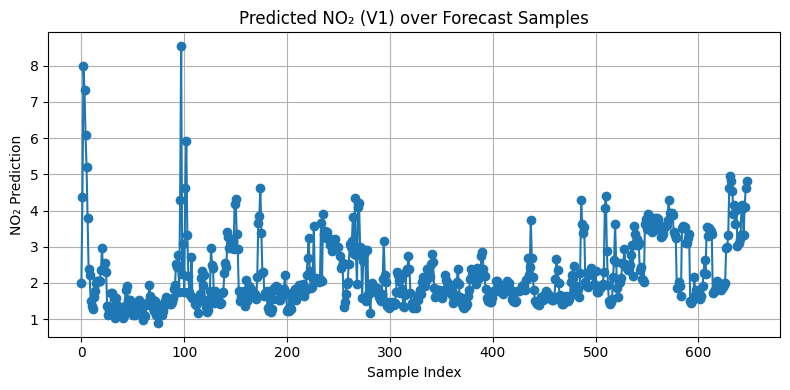

In [22]:
#Forecast with RF
preds_V1 = RF_best_model.predict(data2)
print(preds_V1)

plt.figure(figsize=(8,4))
plt.plot(preds_V1, marker='o', linestyle='-')
plt.title("Predicted NO₂ (V1) over Forecast Samples")
plt.xlabel("Sample Index")
plt.ylabel("NO₂ Prediction")
plt.grid(True)
plt.tight_layout()
plt.show()


### Script for halving specific zones

In [37]:
#DATA PREP
import pandas as pd
# Load the data
data8 = pd.read_excel('../Combined data/Forecast May 2025.xlsx')

data8 = data8.iloc[:, :9].join(data8[['Celle 11', 'Celle 12', 'Celle 16', 'Celle 17', 'Celle 18', 'Celle 22', 'Celle 23']])

# Remove the date column
data8.drop(columns=['Date'], inplace=True)

# Rename columns to their relative position
data8.rename(columns={'Celle 11': 'Traffic east', 'Celle 12': 'Traffic north-east', 'Celle 18': 'Traffic north-west',
                     'Celle 17': 'Traffic Hvidovre', 'Celle 23': 'Traffic west', 'Celle 22': 'Traffic south-west',
                     'Celle 16': 'Traffic south-east'}, inplace=True)

zones_to_halve = [
    'Traffic south-east'    
]
data8[zones_to_halve] = data8[zones_to_halve] * 0.5

# Get the structure of the data
print(data8.info())

# convert the 'Weekday' and 'Hour' Column to be categorical
data8['Weekday'] = data8['Weekday'].astype('category')
data8['Hour'] = data8['Hour'].astype('category')

print(data8.head())

# Ensure the 'Wind_dir' column is numeric before categorization
data8['Wind_dir'] = pd.to_numeric(data8['Wind_dir'], errors='coerce')
# Partition the wind_dir into 8 categories
def categorize_wind_dir(wind_dir):
    if wind_dir < 22.5 or wind_dir >= 337.5:
        return 'N'
    elif 22.5 <= wind_dir < 67.5:
        return 'NE'
    elif 67.5 <= wind_dir < 112.5:
        return 'E'
    elif 112.5 <= wind_dir < 157.5:
        return 'SE'
    elif 157.5 <= wind_dir < 202.5:
        return 'S'
    elif 202.5 <= wind_dir < 247.5:
        return 'SW'
    elif 247.5 <= wind_dir < 292.5:
        return 'W'
    else:
        return 'NW'

# Apply the function to the 'Wind_dir' column
data8['Wind_dir'] = data8['Wind_dir'].apply(categorize_wind_dir)

# Convert the 'Wind_dir' column to categorical
data8['Wind_dir'] = data8['Wind_dir'].astype('category')


#MISSING DATA
# Count rows with missing values
missing_values_count = data8.isnull().sum()
print("Missing values count in each column:")
print(missing_values_count)

# Impute the mean for missing values of numerical columns (the following code can be optimized)
data8['Temp_dry'].fillna(data8['Temp_dry'].mean(), inplace=True)
data8['wind_speed'].fillna(data8['wind_speed'].mean(), inplace=True)
data8['Pressure'].fillna(data8['Pressure'].mean(), inplace=True)
data8['visibility'].fillna(data8['visibility'].mean(), inplace=True)
data8['Humidity'].fillna(data8['Humidity'].mean(), inplace=True)
#data.dropna(inplace=True)

missing_values_count = data8.isnull().sum()
print("Data after dropping rows with missing values:")
print(missing_values_count)

# Transform the categorical variables into dummy variables
data8 = pd.get_dummies(data8, drop_first=True)
print(data8.head())

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 648 entries, 0 to 647
Data columns (total 15 columns):
 #   Column              Non-Null Count  Dtype  
---  ------              --------------  -----  
 0   Weekday             648 non-null    object 
 1   Hour                648 non-null    int64  
 2   Temp_dry            648 non-null    float64
 3   Humidity            648 non-null    int64  
 4   wind_speed          648 non-null    float64
 5   Pressure            648 non-null    float64
 6   visibility          648 non-null    int64  
 7   Wind_dir            648 non-null    int64  
 8   Traffic east        648 non-null    float64
 9   Traffic north-east  648 non-null    float64
 10  Traffic south-east  648 non-null    float64
 11  Traffic Hvidovre    648 non-null    float64
 12  Traffic north-west  648 non-null    float64
 13  Traffic south-west  648 non-null    float64
 14  Traffic west        648 non-null    float64
dtypes: float64(10), int64(4), object(1)
memory usage: 76.1+ K

C:\Users\Jonas\AppData\Local\Temp\ipykernel_24204\327988273.py:65: FutureWarning: A value is trying to be set on a copy of a DataFrame or Series through chained assignment using an inplace method.
The behavior will change in pandas 3.0. This inplace method will never work because the intermediate object on which we are setting values always behaves as a copy.

For example, when doing 'df[col].method(value, inplace=True)', try using 'df.method({col: value}, inplace=True)' or df[col] = df[col].method(value) instead, to perform the operation inplace on the original object.


  data8['Temp_dry'].fillna(data8['Temp_dry'].mean(), inplace=True)
C:\Users\Jonas\AppData\Local\Temp\ipykernel_24204\327988273.py:66: FutureWarning: A value is trying to be set on a copy of a DataFrame or Series through chained assignment using an inplace method.
The behavior will change in pandas 3.0. This inplace method will never work because the intermediate object on which we are setting values always behaves as 

[1.98104106 4.40853844 7.84190429 7.19443426 6.12083497 5.12270497
 3.67958457 2.36997428 2.197075   1.55954943 1.375293   1.29846801
 1.64623784 1.70361429 1.96842914 2.04650879 2.06054014 2.00688594
 2.05125075 2.36416201 2.96003099 2.40655341 2.43078132 2.63286126
 2.42667542 1.39481816 1.10781489 1.20369771 1.33024289 1.71331309
 1.59508706 1.40765328 1.07561007 1.02548967 1.5960055  1.49070034
 1.26527338 1.19018228 1.20937029 1.09596713 1.10697862 1.13716811
 1.36220247 1.81466301 1.93764853 1.49791402 1.49478688 1.59174144
 1.28633353 1.36232826 1.10831169 1.28130501 1.10963982 1.30221908
 1.31543081 1.37606194 1.53100971 1.48908947 1.33826248 1.30753047
 1.09432051 1.14514065 1.09875055 1.36415448 1.56321734 1.59100665
 2.01222676 1.66716902 1.43546689 1.58023435 1.32015658 1.24664547
 1.4975339  1.11316971 0.88367009 1.2378608  1.29307707 1.40068671
 1.11495257 1.21338109 1.35687956 1.50924278 1.59363702 1.58935575
 1.52096562 1.51246278 1.45109053 1.41879829 1.49308547 1.6046

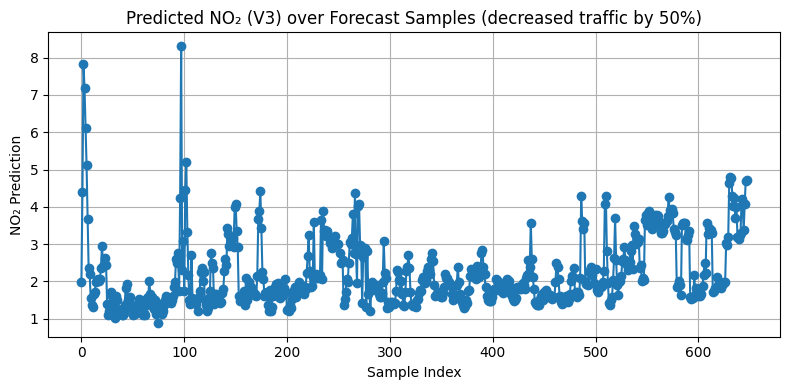

In [38]:
#Forecast with RF
preds_V8 = RF_best_model.predict(data8)
print(preds_V8)

plt.figure(figsize=(8,4))
plt.plot(preds_V8, marker='o', linestyle='-')
plt.title("Predicted NO₂ (V3) over Forecast Samples (decreased traffic by 50%)")
plt.xlabel("Sample Index")
plt.ylabel("NO₂ Prediction")
plt.grid(True)
plt.tight_layout()
plt.show()

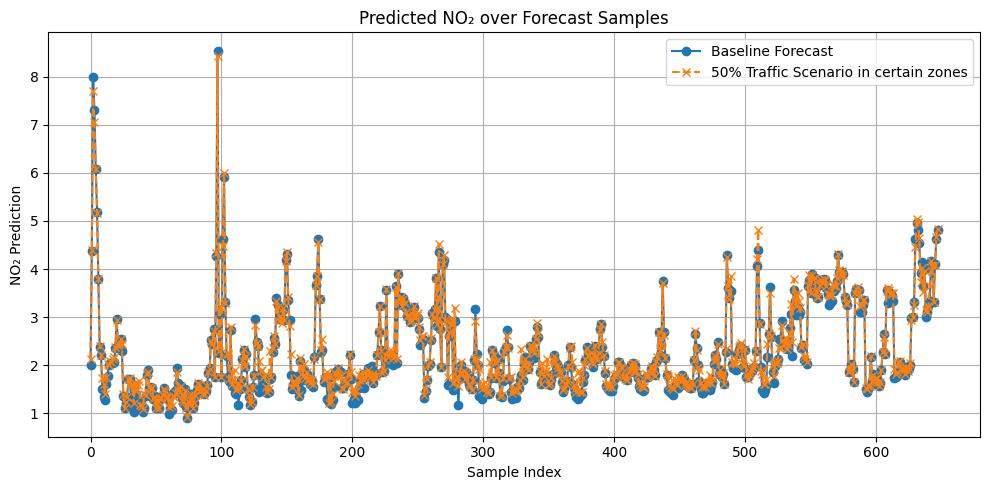

In [ ]:
#Plotting both predictions on the same graph
import matplotlib.pyplot as plt

# Plotting V1 prediction with V4

plt.figure(figsize=(10,5))
plt.plot(preds_V1, marker='o', linestyle='-', label='Baseline Forecast')
plt.plot(preds_V3, marker='x', linestyle='--', label='50% Traffic Scenario in certain zones')

plt.title("Predicted NO₂ over Forecast Samples")
plt.xlabel("Sample Index")
plt.ylabel("NO₂ Prediction")
plt.grid(True)
plt.legend()             # <-- add legend for the two lines
plt.tight_layout()
plt.show()

In [40]:
#Table over the two predictions
import pandas as pd

# compute averages
avg_v1 = preds_V1.mean()
avg_v2 = preds_V2.mean()
avg_v3 = preds_V3.mean()
avg_v4 = preds_V4.mean()
avg_v5 = preds_V5.mean()
avg_v6 = preds_V6.mean()
avg_v7 = preds_V7.mean()
avg_v8 = preds_V8.mean()

# build a DataFrame
df_summary = pd.DataFrame({
    'Scenario': ['Baseline Forecast', '50% Traffic (Traffic East)', '50% Traffic (Traffic North-east)', '50% Traffic (Traffic North-west)', '50% Traffic (Traffic Hvidovre)', '50% Traffic (Traffic West)', '50% Traffic (Traffic South-west)', '50% Traffic (Traffic South-east)'],
    'Average NO₂ in May': [avg_v1, avg_v2, avg_v3, avg_v4, avg_v5, avg_v6, avg_v7, avg_v8]
})

#Showing summary
df_summary

,Scenario,Average NO₂ in May
0,Baseline Forecast,2.214837
1,50% Traffic (Traffic East),2.264546
2,50% Traffic (Traffic North-east),2.337467
3,50% Traffic (Traffic North-west),2.274372
4,50% Traffic (Traffic Hvidovre),2.243341
5,50% Traffic (Traffic West),2.246989
6,50% Traffic (Traffic South-west),2.220795
7,50% Traffic (Traffic South-east),2.206661


### Forecast vs actual values

C:\Users\Jonas\AppData\Local\Temp\ipykernel_24204\3435675136.py:15: FutureWarning: 'H' is deprecated and will be removed in a future version, please use 'h' instead.
  dates_full   = pd.date_range(start, periods=len(preds_V1), freq='H')  # May 1–27
C:\Users\Jonas\AppData\Local\Temp\ipykernel_24204\3435675136.py:16: FutureWarning: 'H' is deprecated and will be removed in a future version, please use 'h' instead.
  dates_actual = pd.date_range(start, periods=len(actual_vals), freq='H')  # May 1–15


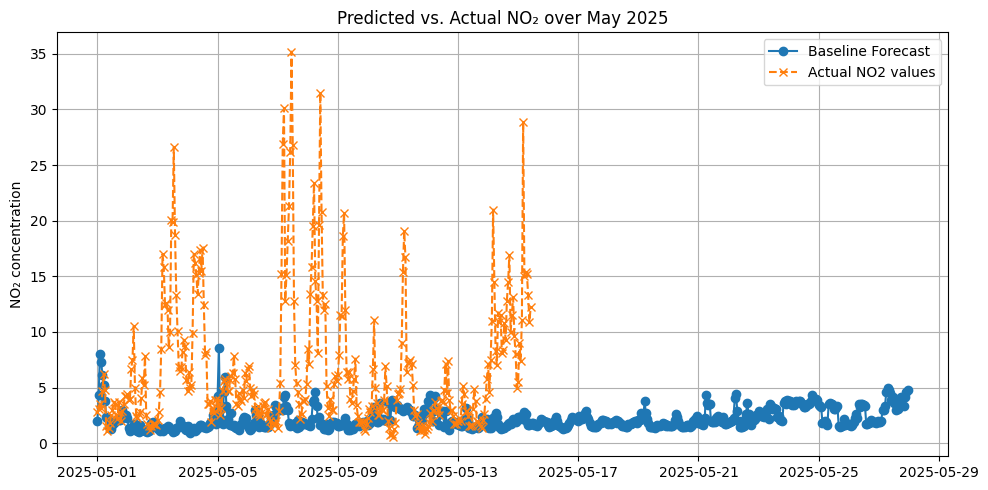

In [54]:
import pandas as pd
import matplotlib.pyplot as plt
import numpy as np
from datetime import datetime

# 1) Load your actuals (up through May 15)
data_actual = pd.read_excel(
    '../Air Quality dataset/NO2 - Maj 2025.xlsx',
    header=None
)
actual_vals = data_actual.iloc[:,0].values

# 2) Build two date‐axes:
start = datetime(2025,5,1)
dates_full   = pd.date_range(start, periods=len(preds_V1), freq='H')  # May 1–27
dates_actual = pd.date_range(start, periods=len(actual_vals), freq='H')  # May 1–15

# 3) Plot
plt.figure(figsize=(10,5))
plt.plot( dates_full,   preds_V1,    marker='o', linestyle='-', label='Baseline Forecast' )
plt.plot( dates_actual, actual_vals, marker='x', linestyle='--', label='Actual NO2 values' )
plt.title("Predicted vs. Actual NO₂ over May 2025")
plt.ylabel("NO₂ concentration")
plt.grid(True)
plt.legend()
plt.tight_layout()
plt.show()


In [55]:
from sklearn.metrics import mean_squared_error

# again, make sure both arrays line up
preds_trim = preds_V1[:len(actual_vals)]

mse = mean_squared_error(actual_vals, preds_trim)
print(f"MSE = {mse:.3f}")


MSE = 57.741


In [56]:
from sklearn.metrics import mean_absolute_error

preds_trim = preds_V1[:len(actual_vals)]
mae = mean_absolute_error(actual_vals, preds_trim)
print(f"MAE = {mae:.3f}")


MAE = 4.917


### Using actual weather values for predicting air quality

In [63]:
#DATA PREP
import pandas as pd
# Load the data
data10 = pd.read_excel('../Combined data/dataset_actual.xlsx')

data10 = data10.iloc[:, :9].join(data10[['Celle 11', 'Celle 12', 'Celle 16', 'Celle 17', 'Celle 18', 'Celle 22', 'Celle 23']])

# Remove the date column
data10.drop(columns=['Date'], inplace=True)

# Rename columns to their relative position
data10.rename(columns={'Celle 11': 'Traffic east', 'Celle 12': 'Traffic north-east', 'Celle 18': 'Traffic north-west',
                     'Celle 17': 'Traffic Hvidovre', 'Celle 23': 'Traffic west', 'Celle 22': 'Traffic south-west',
                     'Celle 16': 'Traffic south-east'}, inplace=True)

data10.rename(columns={'humidity': 'Humidity', 'temp_dry': 'Temp_dry', 'Visibility': 'visibility'}, inplace=True)

# Get the structure of the data
print(data10.info())

# convert the 'Weekday' and 'Hour' Column to be categorical
data10['Weekday'] = data10['Weekday'].astype('category')
data10['Hour'] = data10['Hour'].astype('category')

print(data10.head())

# Ensure the 'Wind_dir' column is numeric before categorization
data10['Wind_dir'] = pd.to_numeric(data10['Wind_dir'], errors='coerce')
# Partition the wind_dir into 8 categories
def categorize_wind_dir(wind_dir):
    if wind_dir < 22.5 or wind_dir >= 337.5:
        return 'N'
    elif 22.5 <= wind_dir < 67.5:
        return 'NE'
    elif 67.5 <= wind_dir < 112.5:
        return 'E'
    elif 112.5 <= wind_dir < 157.5:
        return 'SE'
    elif 157.5 <= wind_dir < 202.5:
        return 'S'
    elif 202.5 <= wind_dir < 247.5:
        return 'SW'
    elif 247.5 <= wind_dir < 292.5:
        return 'W'
    else:
        return 'NW'

# Apply the function to the 'Wind_dir' column
data10['Wind_dir'] = data10['Wind_dir'].apply(categorize_wind_dir)

# Convert the 'Wind_dir' column to categorical
data10['Wind_dir'] = data10['Wind_dir'].astype('category')


#MISSING DATA
# Count rows with missing values
missing_values_count = data10.isnull().sum()
print("Missing values count in each column:")
print(missing_values_count)

# Transform the categorical variables into dummy variables
data10 = pd.get_dummies(data10, drop_first=True)
print(data10.head())

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 336 entries, 0 to 335
Data columns (total 15 columns):
 #   Column              Non-Null Count  Dtype  
---  ------              --------------  -----  
 0   Weekday             336 non-null    object 
 1   Hour                336 non-null    int64  
 2   Temp_dry            336 non-null    float64
 3   Humidity            336 non-null    float64
 4   wind_speed          336 non-null    float64
 5   Pressure            336 non-null    float64
 6   visibility          336 non-null    float64
 7   Wind_dir            336 non-null    int64  
 8   Traffic east        336 non-null    float64
 9   Traffic north-east  336 non-null    float64
 10  Traffic south-east  336 non-null    float64
 11  Traffic Hvidovre    336 non-null    float64
 12  Traffic north-west  336 non-null    float64
 13  Traffic south-west  336 non-null    float64
 14  Traffic west        336 non-null    float64
dtypes: float64(12), int64(2), object(1)
memory usage: 39.5+ K

[ 6.35052152  8.11829802  8.66881451  7.76271531  8.39911798  8.65712699
  8.36046271  3.97663963  3.07613094  2.76949904  2.38666042  2.48233225
  2.03130001  2.26775128  2.76735696  3.38931172  3.9186112   2.94055386
  2.99440474  3.54959413  3.62707909  3.14909896  4.95973065  3.99792887
  2.78846274  2.82730155  1.87673809  3.75826389  3.46860146  2.94692005
  2.61011613  2.54360498  1.34593072  2.19741603  3.22301937  2.7528654
  2.12304737  1.41241743  1.21589637  1.10853404  1.05020129  1.08146105
  1.35799119  1.70241023  2.74744948  2.61297489  3.52306742  3.29738048
  3.15156432  2.49690005  2.86950227  2.45016949  2.30499878  1.93939359
  2.12757189  1.65298113  1.60998859  1.52716552  1.2906971   1.2601227
  1.17431811  1.60838601  2.22201175  1.95446409  3.16775819  4.06691895
  7.30594776  5.20395699  6.19410045  3.4766489   3.39606215  3.26692064
  2.33354285  2.99695379  4.40512352  5.05633557  2.82769684  3.5400732
  2.41424877  2.3100585   1.39779351  1.61641618  1.66

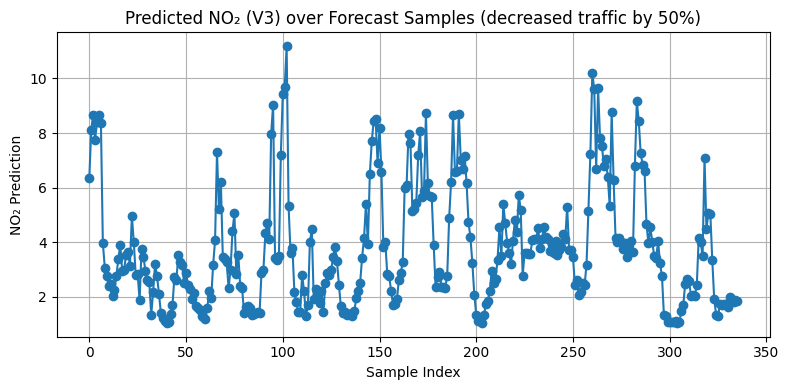

In [64]:
preds_V10 = RF_best_model.predict(data10)
print(preds_V10)

plt.figure(figsize=(8,4))
plt.plot(preds_V10, marker='o', linestyle='-')
plt.title("Predicted NO₂ (V3) over Forecast Samples (decreased traffic by 50%)")
plt.xlabel("Sample Index")
plt.ylabel("NO₂ Prediction")
plt.grid(True)
plt.tight_layout()
plt.show()

C:\Users\Jonas\AppData\Local\Temp\ipykernel_24204\2464357765.py:15: FutureWarning: 'H' is deprecated and will be removed in a future version, please use 'h' instead.
  dates_full   = pd.date_range(start, periods=len(preds_V10), freq='H')  # May 1–27
C:\Users\Jonas\AppData\Local\Temp\ipykernel_24204\2464357765.py:16: FutureWarning: 'H' is deprecated and will be removed in a future version, please use 'h' instead.
  dates_actual = pd.date_range(start, periods=len(actual_vals), freq='H')  # May 1–15


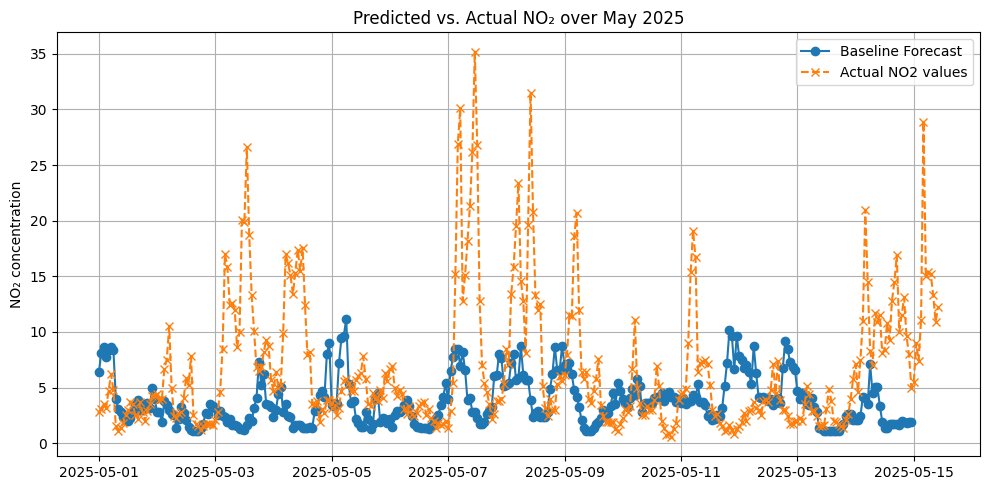

In [65]:
import pandas as pd
import matplotlib.pyplot as plt
import numpy as np
from datetime import datetime

# 1) Load your actuals (up through May 15)
data_actual = pd.read_excel(
    '../Air Quality dataset/NO2 - Maj 2025.xlsx',
    header=None
)
actual_vals = data_actual.iloc[:,0].values

# 2) Build two date‐axes:
start = datetime(2025,5,1)
dates_full   = pd.date_range(start, periods=len(preds_V10), freq='H')  # May 1–27
dates_actual = pd.date_range(start, periods=len(actual_vals), freq='H')  # May 1–15

# 3) Plot
plt.figure(figsize=(10,5))
plt.plot( dates_full,   preds_V10,    marker='o', linestyle='-', label='Baseline Forecast' )
plt.plot( dates_actual, actual_vals, marker='x', linestyle='--', label='Actual NO2 values' )
plt.title("Predicted vs. Actual NO₂ over May 2025")
plt.ylabel("NO₂ concentration")
plt.grid(True)
plt.legend()
plt.tight_layout()
plt.show()

In [70]:
from sklearn.metrics import mean_squared_error

n = min(len(actual_vals), len(preds_V10))
mse = mean_squared_error(actual_vals[:n], preds_V10[:n])
print(f"MSE = {mse:.3f}")


MSE = 46.813


In [71]:
from sklearn.metrics import mean_absolute_error

n = min(len(actual_vals), len(preds_V10))
mae = mean_absolute_error(actual_vals[:n], preds_V10[:n])
print(f"MAE = {mae:.3f}")

MAE = 4.486


### XGBOOST!!!

In [13]:
#Copyright Jonas Riis Vestergaard
import xgboost as xgb
import numpy as np
from xgboost import XGBRegressor  # or XGBClassifier for classification
from sklearn.metrics import mean_squared_error
from sklearn.model_selection import train_test_split
from sklearn.model_selection import TimeSeriesSplit

tscv = TimeSeriesSplit(n_splits=12)

all_predictions = []
all_actuals = []

for train_idx, val_idx in tscv.split(X_train):
    X_t, X_val = X_train.iloc[train_idx], X_train.iloc[val_idx]
    y_t, y_val = y_train.iloc[train_idx], y_train.iloc[val_idx]

    model = XGBRegressor(n_estimators=100, learning_rate=0.1, max_depth=4)
    model.fit(X_t, y_t)

    val_pred = model.predict(X_val)

    # Store results
    all_predictions.extend(val_pred)
    all_actuals.extend(y_val)

    mse_scores = mean_squared_error(y_val, val_pred)
    print(f"Fold MSE: {mean_squared_error(y_val, val_pred):.2f}")

# COMMENT BY SIMON: I believe the below code wrong, as it only prints the last fold of MSE. I have left it so you can inspect it. Use the other code (below that) instead (by William).
##########################################################
# Print average MSE
avg_mse = np.mean(mse_scores)
print(f"\nAverage MSE across folds: {avg_mse:.2f}")
##########################################################

# Average MSE across all predictions
from sklearn.metrics import mean_squared_error
avg_mse = mean_squared_error(all_actuals, all_predictions)
print(f"\nAverage MSE across folds: {avg_mse:.2f}")

Fold MSE: 15.30
Fold MSE: 35.46
Fold MSE: 8.84
Fold MSE: 15.04
Fold MSE: 4.91
Fold MSE: 8.83
Fold MSE: 5.01
Fold MSE: 3.41
Fold MSE: 2.35
Fold MSE: 4.74
Fold MSE: 5.65
Fold MSE: 6.32

Average MSE across folds: 6.32

Average MSE across folds: 9.65


### XGBOOST with Bayesian hyperparameter tuning

In [ ]:
import optuna
import xgboost as xgb
import numpy as np
from sklearn.metrics import mean_squared_error
from sklearn.model_selection import TimeSeriesSplit

def objective(trial):
    # Parameters
    params = {
        "learning_rate":    trial.suggest_float("learning_rate", 0.005, 0.1),
        "max_depth":        trial.suggest_int("max_depth", 3, 15),  
        "min_child_weight": trial.suggest_int("min_child_weight", 1, 25),
        "subsample":        trial.suggest_float("subsample", 0.3, 1),
        "colsample_bytree": trial.suggest_float("colsample_bytree", 0.3, 1),
        "gamma":            trial.suggest_float("gamma", 0.0, 1000.0),
        "reg_lambda":       trial.suggest_float("reg_lambda", 0.0, 100.0),
        "reg_alpha":        trial.suggest_float("reg_alpha", 0.0, 100.0),
        "objective":        "reg:squarederror",
        "random_state":     123,
        "n_jobs":           -1,
    }

    tscv = TimeSeriesSplit(n_splits=10)
    mses = []
    for train_idx, val_idx in tscv.split(X_train):
        X_t, X_v = X_train.iloc[train_idx], X_train.iloc[val_idx]
        y_t, y_v = y_train.iloc[train_idx], y_train.iloc[val_idx]

        # move early_stopping_rounds here:
        model = xgb.XGBRegressor(**params,
                                 n_estimators=4000,
                                 early_stopping_rounds=50)
        model.fit(
            X_t, y_t,
            eval_set=[(X_v, y_v)],
            verbose=False
        )
        preds = model.predict(X_v)
        mses.append(mean_squared_error(y_v, preds))

    return np.mean(mses)


#Bayesian optimization
study = optuna.create_study(
    direction="minimize",
    sampler=optuna.samplers.TPESampler(seed=123)
)
study.optimize(objective, n_trials=1000)

print("Best params:", study.best_params)
print("Best CV MSE:", study.best_value)

#Optimal amount of trees (cross validated)
dtrain = xgb.DMatrix(X_train, label=y_train)

#cv_results = xgb.cv(
#    params={**study.best_params, 
#            "objective": "reg:squarederror",
#            "random_state": 123,
#            "n_jobs": -1},
#    dtrain=dtrain,
#    num_boost_round=10000,
#    nfold=10,                   
#    early_stopping_rounds=50,
#    metrics="rmse",             
#    seed=123,
#    verbose_eval=False
#)

#best_nrounds = len(cv_results)
#print("Optimal boosting rounds:", best_nrounds)


[I 2025-05-19 12:02:38,994] A new study created in memory with name: no-name-b075cb03-e45a-4b77-ae25-a8eb3e2c1846
[I 2025-05-19 12:02:41,133] Trial 0 finished with value: 10.788910890802555 and parameters: {'learning_rate': 0.07116457263179686, 'max_depth': 6, 'min_child_weight': 6, 'subsample': 0.6859203383580239, 'colsample_bytree': 0.8036282788498941, 'gamma': 423.10646012446097, 'reg_lambda': 98.07641983846155, 'reg_alpha': 68.48297385848633}. Best is trial 0 with value: 10.788910890802555.
[I 2025-05-19 12:02:43,335] Trial 1 finished with value: 9.283428790879924 and parameters: {'learning_rate': 0.050688530641014286, 'max_depth': 8, 'min_child_weight': 9, 'subsample': 0.8103347951688291, 'colsample_bytree': 0.607000571275737, 'gamma': 59.67789660956835, 'reg_lambda': 39.804425533043144, 'reg_alpha': 73.79954057320357}. Best is trial 1 with value: 9.283428790879924.
[I 2025-05-19 12:02:45,167] Trial 2 finished with value: 11.770016188316228 and parameters: {'learning_rate': 0.0223

Test MSE:  8.0789
Test MAE:  1.7566


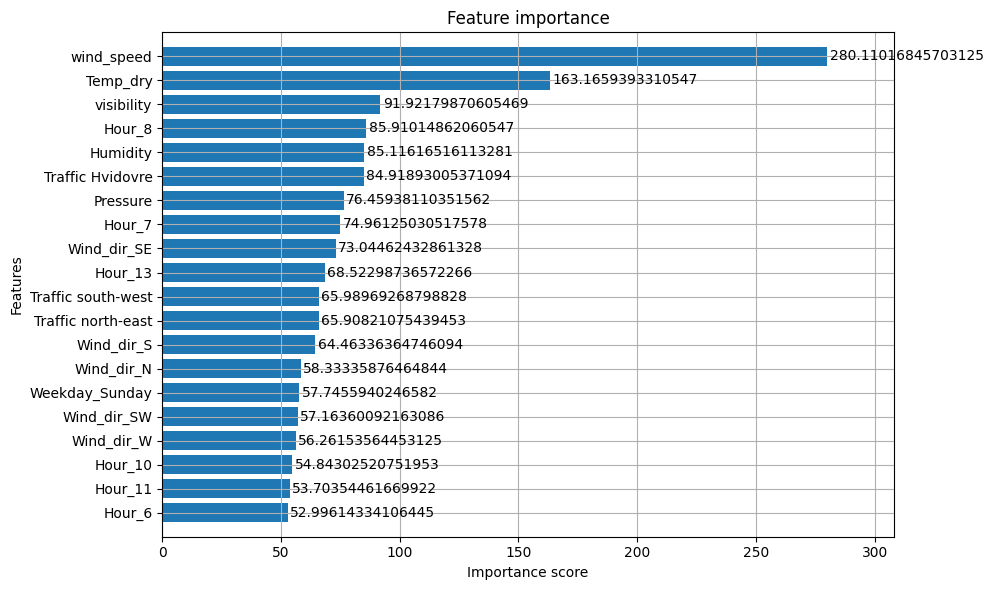

In [ ]:
#Training final model
#XGB_final = xgb.train(
#    params={**study.best_params, "objective": "reg:squarederror"},
#    dtrain=dtrain,
#    num_boost_round=best_nrounds,
#    verbose_eval=False
#)

#Needed to calculate MAE after, the previous code is for the original XGB_final but instead of running it again the best parameters we inputted manually 

# Manually specifying best parameters for faster calculation of MAE
best_params_manual = {
    'eta':               0.07558521288871195,
    'max_depth':         11,
    'subsample':         0.7219144726286058,
    'colsample_bytree':  0.7149851357536873,
    'min_child_weight':  5,
    'gamma':             19.584740803342818,
    'lambda':            63.205164268043404,
    'alpha':             0.21681149272655587,
    'objective':         'reg:squarederror'
}

dtrain = xgb.DMatrix(X_train, label=y_train)

# Training final model manually
XGB_final = xgb.train(
    params=best_params_manual,
    dtrain=dtrain,
    num_boost_round=1157,
    verbose_eval=False
)

#DMatrix for test data
dtest = xgb.DMatrix(X_test, label=y_test)
y_pred = XGB_final.predict(dtest)

from sklearn.metrics import mean_squared_error, mean_absolute_error
mse  = mean_squared_error(y_test, y_pred)
mae = mean_absolute_error(y_test, y_pred)

print(f"Test MSE:  {mse:.4f}")
print(f"Test MAE:  {mae:.4f}")

#Feature importance plot for XGBoost
import matplotlib.pyplot as plt
ax = xgb.plot_importance(
    XGB_final,
    max_num_features=20,
    importance_type="gain",
    height=0.8
)
fig = ax.figure
fig.set_size_inches(10, 6)
plt.tight_layout()
plt.show()

In [ ]:
#Had some problems with installing optuna, if you also get this error (even though the requirements.txt works) then try running this.
import sys
!"{sys.executable}" -m pip install optuna==4.3.0

  Using cached optuna-4.3.0-py3-none-any.whl.metadata (17 kB)
  Using cached alembic-1.15.2-py3-none-any.whl.metadata (7.3 kB)
  Using cached colorlog-6.9.0-py3-none-any.whl.metadata (10 kB)
  Using cached sqlalchemy-2.0.40-cp312-cp312-win_amd64.whl.metadata (9.9 kB)
  Using cached tqdm-4.67.1-py3-none-any.whl.metadata (57 kB)
  Using cached mako-1.3.10-py3-none-any.whl.metadata (2.9 kB)
  Using cached greenlet-3.2.1-cp312-cp312-win_amd64.whl.metadata (4.2 kB)
Using cached optuna-4.3.0-py3-none-any.whl (386 kB)
Using cached alembic-1.15.2-py3-none-any.whl (231 kB)
Using cached sqlalchemy-2.0.40-cp312-cp312-win_amd64.whl (2.1 MB)
Using cached colorlog-6.9.0-py3-none-any.whl (11 kB)
Using cached tqdm-4.67.1-py3-none-any.whl (78 kB)
Using cached greenlet-3.2.1-cp312-cp312-win_amd64.whl (296 kB)
Using cached mako-1.3.10-py3-none-any.whl (78 kB)



[notice] A new release of pip is available: 24.2 -> 25.1.1
[notice] To update, run: python.exe -m pip install --upgrade pip


In [ ]:
#Had some problems with installing optuna, if you also get this error (even though the requirements.txt works) then try running this.
import sys
!"{sys.executable}" -m pip install optuna==4.3.0

Visualizing the results

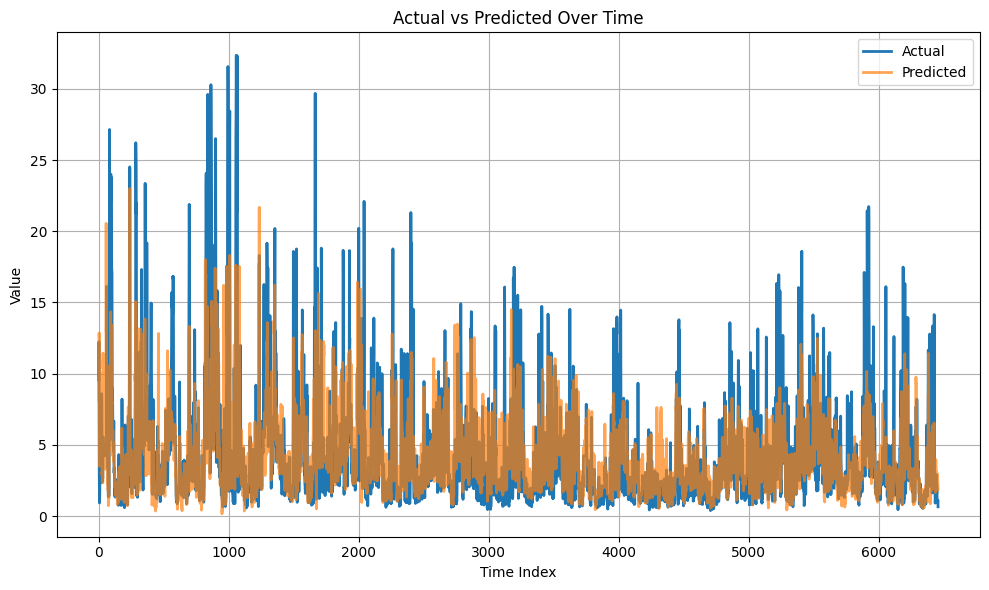


Actual vs Predicted:
      Actual  Predicted
0   9.571613   8.106401
1  12.250150  10.702187
2   4.387977  12.860296
3   3.054045  12.254664
4   1.247701   3.559229
5   0.924189   3.824902
6   1.209380   3.506981
7   1.578022   3.547015
8   3.228724   7.729162
9   5.306948   9.205032


In [ ]:
# Optional: convert to DataFrame for easy comparison
comparison_df = pd.DataFrame({
    "Actual": all_actuals,
    "Predicted": all_predictions
})

plt.figure(figsize=(10, 6))
plt.plot(comparison_df["Actual"], label="Actual", linewidth=2)
plt.plot(comparison_df["Predicted"], label="Predicted", linewidth=2, alpha=0.7)
plt.xlabel("Time Index")
plt.ylabel("Value")
plt.title("Actual vs Predicted Over Time")
plt.legend()
plt.grid(True)
plt.tight_layout()
plt.show()

print("\nActual vs Predicted:")
print(comparison_df.head(10))  # Print first 10 comparisons

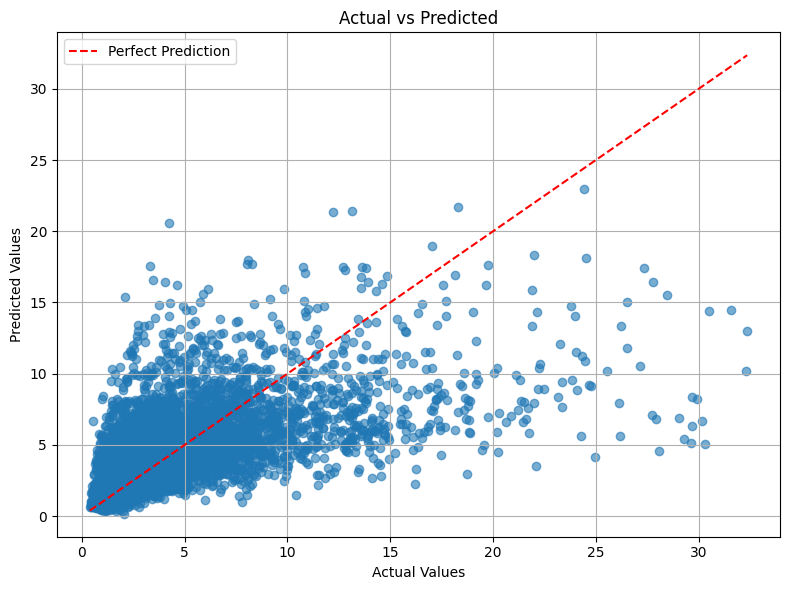

In [ ]:
# This plot could be deleted... shows the residuals
plt.figure(figsize=(8, 6))
plt.scatter(comparison_df["Actual"], comparison_df["Predicted"], alpha=0.6)
plt.plot([comparison_df["Actual"].min(), comparison_df["Actual"].max()],
         [comparison_df["Actual"].min(), comparison_df["Actual"].max()],
         color='red', linestyle='--', label='Perfect Prediction')

plt.xlabel("Actual Values")
plt.ylabel("Predicted Values")
plt.title("Actual vs Predicted")
plt.legend()
plt.grid(True)
plt.tight_layout()
plt.show()

## Baseline to beat

The following is a baseline which always guesses the mean.

In [13]:
# Calculate the mean of the training target variable
baseline_prediction = y_train.mean()

# Predict the mean for the test set
y_baseline_pred = [baseline_prediction] * len(y_test)

# Evaluate the baseline model using Mean Squared Error
baseline_mse = mean_squared_error(y_test, y_baseline_pred)
print(f"Baseline Mean Squared Error: {baseline_mse}")

Baseline Mean Squared Error: 15.568077497911679


The MSE is at 15.6, which is significantly higher than our other models. Another baseline could be guessing the same NO2 value as the previous day.

Below is another baseline, which guesses the same NO2 level of the same hour from one day before.

In [90]:
# Create a new dataframe as a copy of the original data
naive_forecast_data = data.copy()

# Create a naive forecast by shifting the NO2_ppb column by 24 hours
naive_forecast_data['NO2_naive_forecast'] = naive_forecast_data['NO2_ppb'].shift(24)

# Drop rows with NaN values caused by the shift
naive_forecast_data = naive_forecast_data.dropna(subset=['NO2_naive_forecast'])

# Evaluate the naive forecast model using Mean Squared Error

naive_mse = mean_squared_error(naive_forecast_data['NO2_ppb'], naive_forecast_data['NO2_naive_forecast'])
print(f"Naive Forecast Mean Squared Error: {naive_mse}")

naive_mae = mean_absolute_error(naive_forecast_data['NO2_ppb'], naive_forecast_data['NO2_naive_forecast'])
print(f"Naive Forecast Mean Squared Error: {naive_mae}")

Naive Forecast Mean Squared Error: 21.797102656616282
Naive Forecast Mean Squared Error: 2.856957392808259


## NOx --> dependent variable

Changed from NO2 to NOx as the dependent variable otherwise nothing has changed

In [107]:
import pandas as pd
# Load the data
data6 = pd.read_csv('../Combined data/combined_data_hourly_2023.csv')

data6 = data6.iloc[:, :11].join(data6[['Celle 11', 'Celle 12', 'Celle 16', 'Celle 17', 'Celle 18', 'Celle 22', 'Celle 23']])

# Remove the date column
data6.drop(columns=['Date'], inplace=True)

# Rename columns to their relative position
data6.rename(columns={'Celle 11': 'Traffic east', 'Celle 12': 'Traffic north-east', 'Celle 18': 'Traffic north-west',
                     'Celle 17': 'Traffic Hvidovre', 'Celle 23': 'Traffic west', 'Celle 22': 'Traffic south-west',
                     'Celle 16': 'Traffic south-east'}, inplace=True)

# Get the structure of the data
print(data6.info())

# convert the 'Weekday' and 'Hour' Column to be categorical
data6['Weekday'] = data6['Weekday'].astype('category')
data6['Hour'] = data6['Hour'].astype('category')

print(data6.head())

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 8758 entries, 0 to 8757
Data columns (total 17 columns):
 #   Column              Non-Null Count  Dtype  
---  ------              --------------  -----  
 0   Weekday             8758 non-null   object 
 1   Hour                8758 non-null   int64  
 2   NO2_ppb             8649 non-null   float64
 3   NOx_ppb             8497 non-null   float64
 4   Temp_dry            8757 non-null   float64
 5   Humidity            8757 non-null   float64
 6   wind_speed          8757 non-null   float64
 7   Pressure            8757 non-null   float64
 8   visibility          8758 non-null   float64
 9   Wind_dir            8757 non-null   float64
 10  Traffic east        8758 non-null   float64
 11  Traffic north-east  8758 non-null   float64
 12  Traffic south-east  8758 non-null   float64
 13  Traffic Hvidovre    8758 non-null   float64
 14  Traffic north-west  8758 non-null   float64
 15  Traffic south-west  8758 non-null   float64
 16  Traffi

In [108]:
# Ensure the 'Wind_dir' column is numeric before categorization
data6['Wind_dir'] = pd.to_numeric(data6['Wind_dir'], errors='coerce')
# Partition the wind_dir into 8 categories
def categorize_wind_dir(wind_dir):
    if wind_dir < 22.5 or wind_dir >= 337.5:
        return 'N'
    elif 22.5 <= wind_dir < 67.5:
        return 'NE'
    elif 67.5 <= wind_dir < 112.5:
        return 'E'
    elif 112.5 <= wind_dir < 157.5:
        return 'SE'
    elif 157.5 <= wind_dir < 202.5:
        return 'S'
    elif 202.5 <= wind_dir < 247.5:
        return 'SW'
    elif 247.5 <= wind_dir < 292.5:
        return 'W'
    else:
        return 'NW'

# Apply the function to the 'Wind_dir' column
data6['Wind_dir'] = data6['Wind_dir'].apply(categorize_wind_dir)

# Convert the 'Wind_dir' column to categorical
data6['Wind_dir'] = data6['Wind_dir'].astype('category')

Missing values count in each column:
Weekday                 0
Hour                    0
NO2_ppb               109
NOx_ppb               261
Temp_dry                1
Humidity                1
wind_speed              1
Pressure                1
visibility              0
Wind_dir                0
Traffic east            0
Traffic north-east      0
Traffic south-east      0
Traffic Hvidovre        0
Traffic north-west      0
Traffic south-west      0
Traffic west            0
dtype: int64


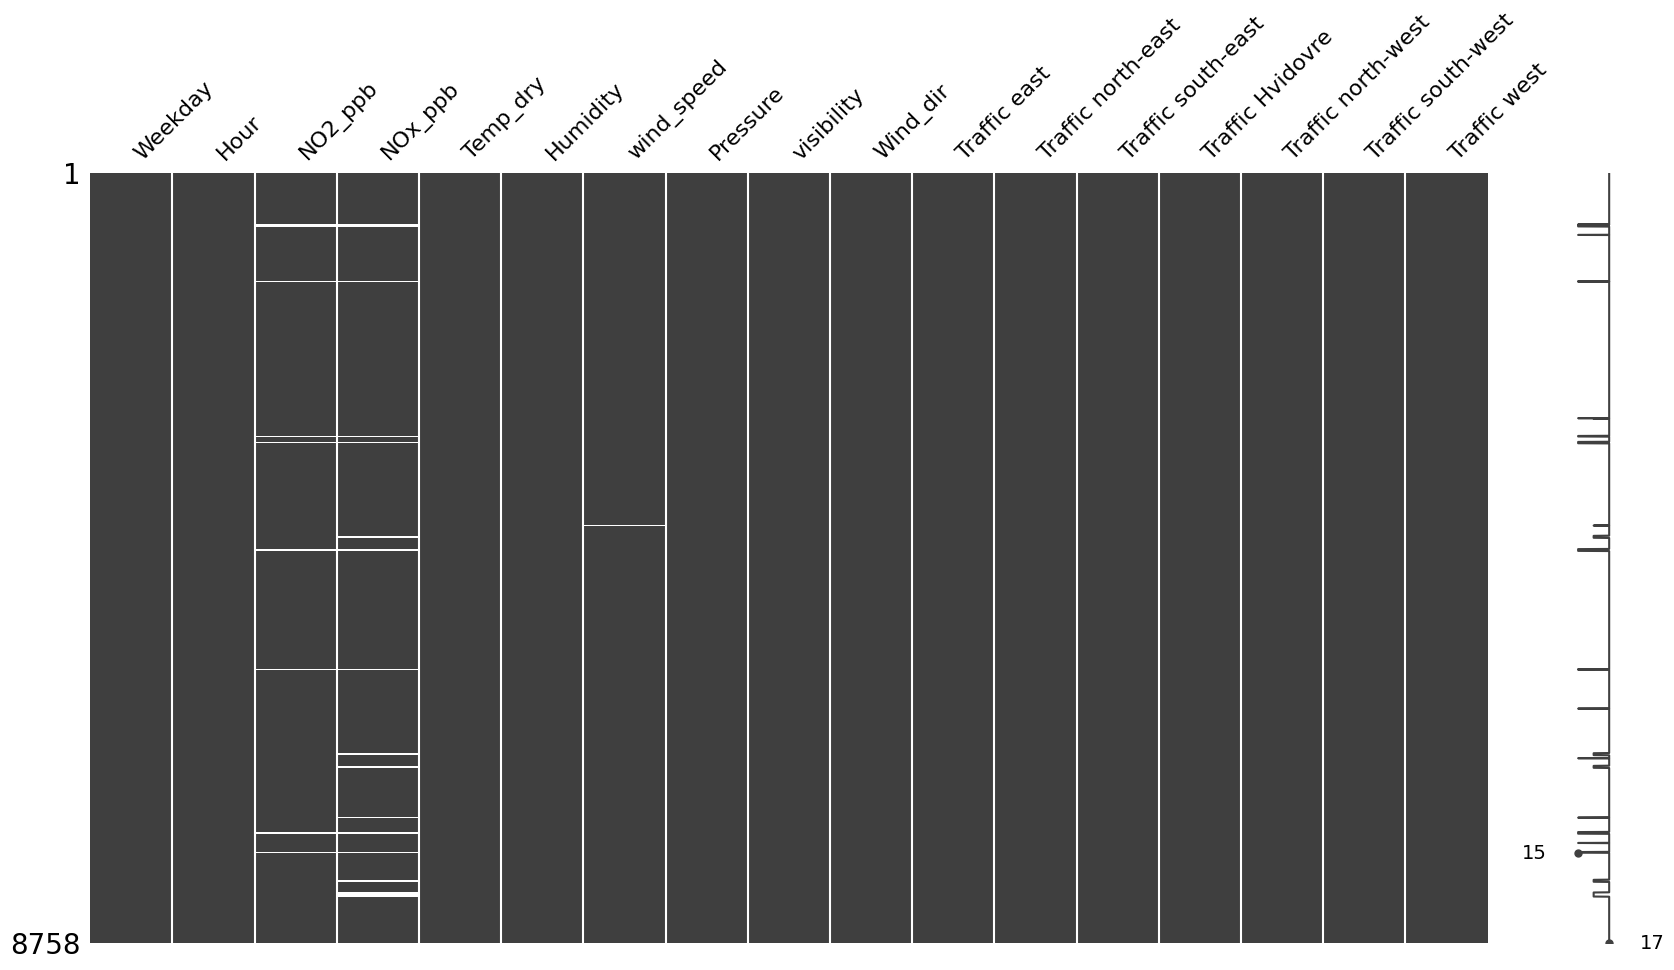

Data after dropping rows with missing values:
Weekday               0
Hour                  0
NO2_ppb               0
NOx_ppb               0
Temp_dry              0
Humidity              0
wind_speed            0
Pressure              0
visibility            0
Wind_dir              0
Traffic east          0
Traffic north-east    0
Traffic south-east    0
Traffic Hvidovre      0
Traffic north-west    0
Traffic south-west    0
Traffic west          0
dtype: int64


C:\Users\Jonas\AppData\Local\Temp\ipykernel_37516\3450896204.py:14: FutureWarning: A value is trying to be set on a copy of a DataFrame or Series through chained assignment using an inplace method.
The behavior will change in pandas 3.0. This inplace method will never work because the intermediate object on which we are setting values always behaves as a copy.

For example, when doing 'df[col].method(value, inplace=True)', try using 'df.method({col: value}, inplace=True)' or df[col] = df[col].method(value) instead, to perform the operation inplace on the original object.


  data6['NO2_ppb'].fillna(data6['NO2_ppb'].mean(), inplace=True)
C:\Users\Jonas\AppData\Local\Temp\ipykernel_37516\3450896204.py:15: FutureWarning: A value is trying to be set on a copy of a DataFrame or Series through chained assignment using an inplace method.
The behavior will change in pandas 3.0. This inplace method will never work because the intermediate object on which we are setting values always behaves as 

In [109]:
# Count rows with missing values
missing_values_count = data6.isnull().sum()
print("Missing values count in each column:")
print(missing_values_count)

# Visualize the missing data
import missingno as msno
import matplotlib.pyplot as plt

msno.matrix(data6, figsize=(20, 10))
plt.show()

# Impute the mean for missing values of numerical columns (the following code can be optimized)
data6['NO2_ppb'].fillna(data6['NO2_ppb'].mean(), inplace=True)
data6['NOx_ppb'].fillna(data6['NOx_ppb'].mean(), inplace=True)
data6['Temp_dry'].fillna(data6['Temp_dry'].mean(), inplace=True)
data6['wind_speed'].fillna(data6['wind_speed'].mean(), inplace=True)
data6['Pressure'].fillna(data6['Pressure'].mean(), inplace=True)
data6['visibility'].fillna(data6['visibility'].mean(), inplace=True)
data6['Humidity'].fillna(data6['Humidity'].mean(), inplace=True)
#data.dropna(inplace=True)

missing_values_count = data6.isnull().sum()
print("Data after dropping rows with missing values:")
print(missing_values_count)

# Consider using KNN to impute missing values instead.

In [110]:
# Transform the categorical variables into dummy variables
data6 = pd.get_dummies(data6, drop_first=True)
print(data6.head())

    NO2_ppb    NOx_ppb   Temp_dry   Humidity  wind_speed     Pressure  \
0  9.609539  14.333718   8.083333  98.500000    5.600000  1000.050000   
1  2.431203   2.601390   9.516667  97.500000    6.600000   999.616667   
2  1.794863   1.888760  10.200000  95.000000   10.633333   999.666667   
3  1.286549   1.169177  10.033333  95.666667   10.300000   999.866667   
4  1.020709   0.850521  10.166667  95.000000   10.300000  1000.300000   

    visibility  Traffic east  Traffic north-east  Traffic south-east  ...  \
0  3600.000000          3.73                8.40                0.93  ...   
1  4250.000000          1.87                5.60                0.93  ...   
2  4550.000000          0.93                3.73                0.93  ...   
3  3566.666667          0.00                2.80                0.00  ...   
4  3650.000000          0.00                0.93                0.00  ...   

   Hour_21  Hour_22  Hour_23  Wind_dir_N  Wind_dir_NE  Wind_dir_NW  \
0    False    False    False

In [111]:
# X and Y. X should be all variables except NO2_ppb, and Y should be NO2_ppb
X2 = data6.drop(columns=['NO2_ppb', 'NOx_ppb'])
y2 = data6['NOx_ppb']

# Split the data into training and testing sets
split_index = int(len(X2) * 0.8)

# Chronological split, which is possible as the data is already in order
X_train2, X_test2 = X2.iloc[:split_index], X2.iloc[split_index:]
y_train2, y_test2 = y2.iloc[:split_index], y2.iloc[split_index:]

In [118]:
import numpy as np
from sklearn.ensemble import RandomForestRegressor, ExtraTreesRegressor
from sklearn.model_selection import GridSearchCV, KFold

#*Note: The models are quite large due to the expansive grid search (Takes about 30 min to run ATM)

#Setting up training data
n_features2 = X_train2.shape[1]

#mtry grid
mtry_grid = [
    int(np.floor(n_features * p))
    for p in [0.05, 0.10, 0.15, 0.25, 0.30,
              0.35, 0.40, 0.45, 0.50, 0.55,
              0.60, 0.65, 0.70, 0.75, 0.80, 0.85]
]

#Rest of parameter grid
param_grid = {
    "max_features":   mtry_grid,
    "min_samples_leaf": list(range(1, 10)) #Can change this to keep it from fitting so much to the training data
}

#10-fold CV control (shuffled for extra randomness):
cv = KFold(n_splits=10, shuffle=True, random_state=123)

#There follows two models, just pick the one with the lowest CV validated MSE and test that model on the test set

# ——————————————
# A) “variance” splitrule → RandomForestRegressor
# ——————————————
rf2 = RandomForestRegressor(
    criterion="squared_error",
    random_state=123,
    n_jobs=-1
)
rf_search2 = GridSearchCV(
    rf2,
    param_grid,
    cv=cv,
    verbose=1,
    n_jobs=-1,
    scoring="neg_mean_squared_error"
)
rf_search2.fit(X_train2, y_train2)

print("RF (variance) best params:", rf_search2.best_params_)
print("RF CV MSE:", -rf_search2.best_score_)

# ————————————————————
# B) “extratrees” splitrule → ExtraTreesRegressor
# ————————————————————
et = ExtraTreesRegressor(
    random_state=123,
    n_jobs=-1
)
et_search2 = GridSearchCV(
    et,
    param_grid,
    cv=cv,
    verbose=1,
    n_jobs=-1,
    scoring="neg_mean_squared_error"
)
et_search2.fit(X_train2, y_train2)

print("ET (extratrees) best params:", et_search2.best_params_)
print("ET CV MSE:", -et_search2.best_score_)

Fitting 10 folds for each of 144 candidates, totalling 1440 fits
RF (variance) best params: {'max_features': 19, 'min_samples_leaf': 1}
RF CV MSE: 17.404734140265173
Fitting 10 folds for each of 144 candidates, totalling 1440 fits
ET (extratrees) best params: {'max_features': 36, 'min_samples_leaf': 2}
ET CV MSE: 17.22332817590778


Random Forest Mean Squared Error: 34.50947632499186
Random Forest (extra trees) Mean Squared Error: 13.593764775955869


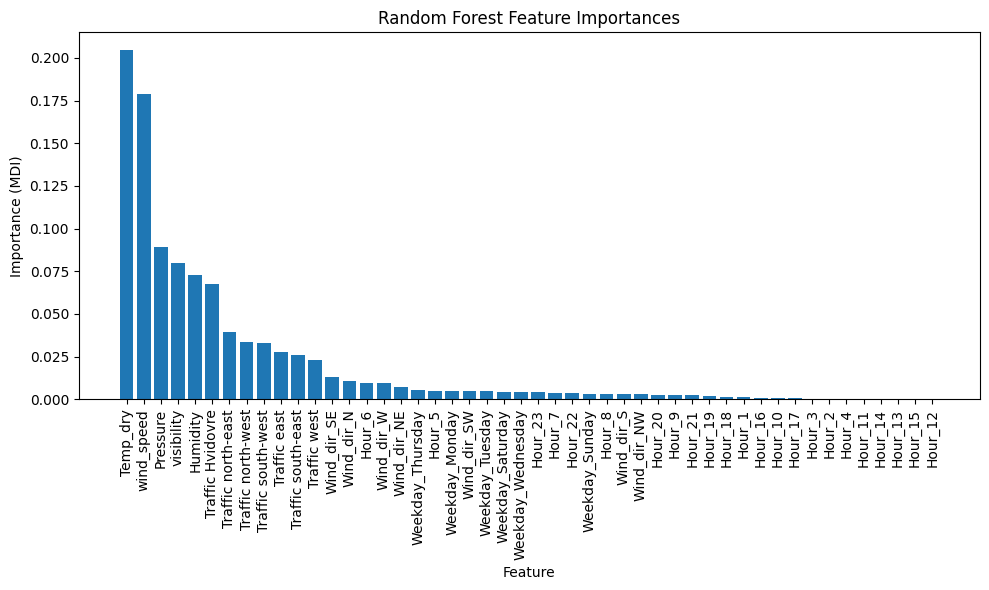

In [119]:
#Rf best
RF_best_model2 = rf_search2.best_estimator_
RF_pred2 = RF_best_model2.predict(X_test2)

RF_mse2 = mean_squared_error(y_test2, RF_pred2)
print(f"Random Forest Mean Squared Error: {RF_mse2}")

#ET best
ET_best_model2 = et_search2.best_estimator_
ET_pred2 = ET_best_model2.predict(X_test)

ET_mse2 = mean_squared_error(y_test, ET_pred2)
print(f"Random Forest (extra trees) Mean Squared Error: {ET_mse2}")

#Variable importance of the RF model
import numpy as np
import matplotlib.pyplot as plt

# Extract importances and feature names
importances = RF_best_model2.feature_importances_
feature_names = X_train2.columns 

# Sort by importance (descending)
indices = np.argsort(importances)[::-1]
sorted_importances = importances[indices]
sorted_features    = feature_names[indices]

plt.figure(figsize=(10, 6))
plt.title("Random Forest Feature Importances")
plt.bar(
    range(len(sorted_importances)),
    sorted_importances,
    align="center"
)
plt.xticks(
    range(len(sorted_importances)),
    sorted_features,
    rotation=90
)
plt.xlabel("Feature")
plt.ylabel("Importance (MDI)")
plt.tight_layout()
plt.show()

### Script for halving specific zones (for NOx)

### No change in traffic

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 648 entries, 0 to 647
Data columns (total 15 columns):
 #   Column              Non-Null Count  Dtype  
---  ------              --------------  -----  
 0   Weekday             648 non-null    object 
 1   Hour                648 non-null    int64  
 2   Temp_dry            648 non-null    float64
 3   Humidity            648 non-null    int64  
 4   wind_speed          648 non-null    float64
 5   Pressure            648 non-null    float64
 6   visibility          648 non-null    int64  
 7   Wind_dir            648 non-null    int64  
 8   Traffic east        648 non-null    float64
 9   Traffic north-east  648 non-null    float64
 10  Traffic south-east  648 non-null    float64
 11  Traffic Hvidovre    648 non-null    float64
 12  Traffic north-west  648 non-null    float64
 13  Traffic south-west  648 non-null    float64
 14  Traffic west        648 non-null    float64
dtypes: float64(10), int64(4), object(1)
memory usage: 76.1+ K

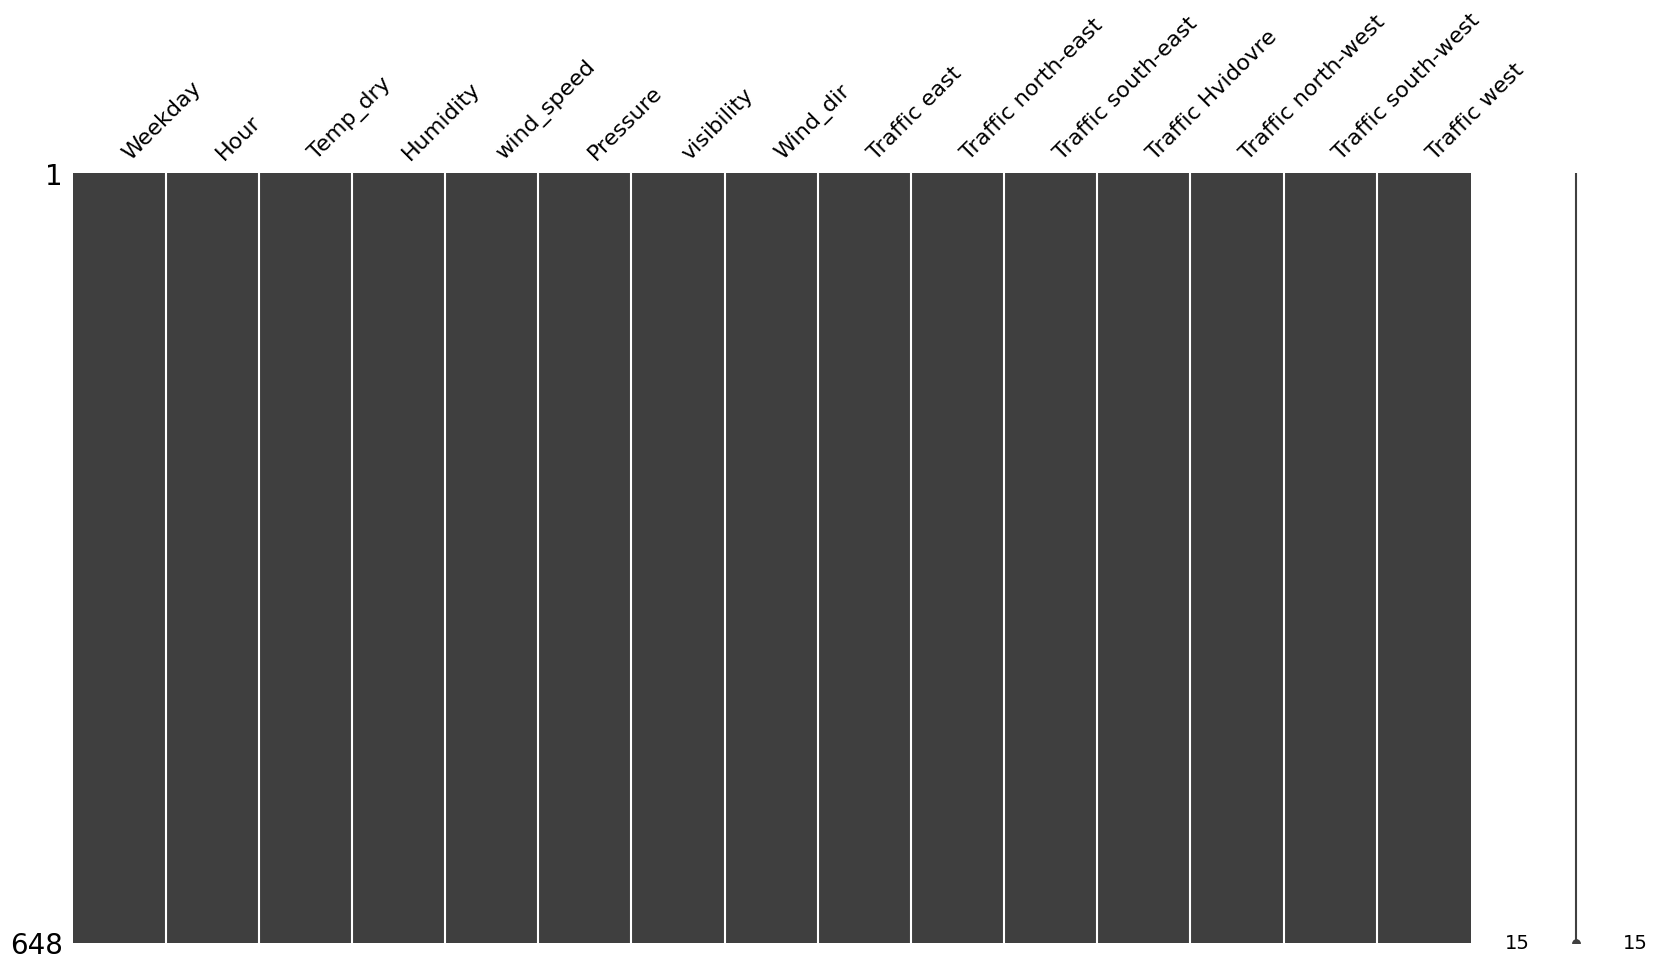

Data after dropping rows with missing values:
Weekday               0
Hour                  0
Temp_dry              0
Humidity              0
wind_speed            0
Pressure              0
visibility            0
Wind_dir              0
Traffic east          0
Traffic north-east    0
Traffic south-east    0
Traffic Hvidovre      0
Traffic north-west    0
Traffic south-west    0
Traffic west          0
dtype: int64
   Temp_dry  Humidity  wind_speed  Pressure  visibility  Traffic east  \
0      13.0        72         6.1    1021.5       26540      3.391251   
1      12.2        78         4.0    1021.9       21420      2.543438   
2      11.8        71         1.4    1021.9       12680      2.543438   
3      11.4        65         1.1    1022.1        4420      1.695626   
4      11.0        71         2.5    1021.9        1440      0.000000   

   Traffic north-east  Traffic south-east  Traffic Hvidovre  \
0            0.847813            2.543438          2.543438   
1            0.0

C:\Users\Jonas\AppData\Local\Temp\ipykernel_37516\3635548126.py:67: FutureWarning: A value is trying to be set on a copy of a DataFrame or Series through chained assignment using an inplace method.
The behavior will change in pandas 3.0. This inplace method will never work because the intermediate object on which we are setting values always behaves as a copy.

For example, when doing 'df[col].method(value, inplace=True)', try using 'df.method({col: value}, inplace=True)' or df[col] = df[col].method(value) instead, to perform the operation inplace on the original object.


  data9['Temp_dry'].fillna(data9['Temp_dry'].mean(), inplace=True)
C:\Users\Jonas\AppData\Local\Temp\ipykernel_37516\3635548126.py:68: FutureWarning: A value is trying to be set on a copy of a DataFrame or Series through chained assignment using an inplace method.
The behavior will change in pandas 3.0. This inplace method will never work because the intermediate object on which we are setting values always behaves a

In [168]:
#DATA PREP
import pandas as pd
# Load the data
data9 = pd.read_excel('../Combined data/Forecast May 2025.xlsx')

data9 = data9.iloc[:, :9].join(data9[['Celle 11', 'Celle 12', 'Celle 16', 'Celle 17', 'Celle 18', 'Celle 22', 'Celle 23']])

# Remove the date column
data9.drop(columns=['Date'], inplace=True)

# Rename columns to their relative position
data9.rename(columns={'Celle 11': 'Traffic east', 'Celle 12': 'Traffic north-east', 'Celle 18': 'Traffic north-west',
                     'Celle 17': 'Traffic Hvidovre', 'Celle 23': 'Traffic west', 'Celle 22': 'Traffic south-west',
                     'Celle 16': 'Traffic south-east'}, inplace=True)

# Get the structure of the data
print(data9.info())

# convert the 'Weekday' and 'Hour' Column to be categorical
data9['Weekday'] = data9['Weekday'].astype('category')
data9['Hour'] = data9['Hour'].astype('category')

print(data9.head())

# Ensure the 'Wind_dir' column is numeric before categorization
data9['Wind_dir'] = pd.to_numeric(data9['Wind_dir'], errors='coerce')
# Partition the wind_dir into 8 categories
def categorize_wind_dir(wind_dir):
    if wind_dir < 22.5 or wind_dir >= 337.5:
        return 'N'
    elif 22.5 <= wind_dir < 67.5:
        return 'NE'
    elif 67.5 <= wind_dir < 112.5:
        return 'E'
    elif 112.5 <= wind_dir < 157.5:
        return 'SE'
    elif 157.5 <= wind_dir < 202.5:
        return 'S'
    elif 202.5 <= wind_dir < 247.5:
        return 'SW'
    elif 247.5 <= wind_dir < 292.5:
        return 'W'
    else:
        return 'NW'

# Apply the function to the 'Wind_dir' column
data9['Wind_dir'] = data9['Wind_dir'].apply(categorize_wind_dir)

# Convert the 'Wind_dir' column to categorical
data9['Wind_dir'] = data9['Wind_dir'].astype('category')


#MISSING DATA
# Count rows with missing values
missing_values_count = data9.isnull().sum()
print("Missing values count in each column:")
print(missing_values_count)

# Visualize the missing data
import missingno as msno
import matplotlib.pyplot as plt

msno.matrix(data9, figsize=(20, 10))
plt.show()

# Impute the mean for missing values of numerical columns (the following code can be optimized)
data9['Temp_dry'].fillna(data9['Temp_dry'].mean(), inplace=True)
data9['wind_speed'].fillna(data9['wind_speed'].mean(), inplace=True)
data9['Pressure'].fillna(data9['Pressure'].mean(), inplace=True)
data9['visibility'].fillna(data9['visibility'].mean(), inplace=True)
data9['Humidity'].fillna(data9['Humidity'].mean(), inplace=True)
#data.dropna(inplace=True)

missing_values_count = data9.isnull().sum()
print("Data after dropping rows with missing values:")
print(missing_values_count)

# Transform the categorical variables into dummy variables
data9 = pd.get_dummies(data9, drop_first=True)
print(data9.head())

[3.26816074 6.10758286 9.37406851 8.84277759 5.94006138 6.37849402
 5.02069899 3.64686592 3.20683119 2.53190415 2.36769258 2.35178689
 3.17719344 3.30384784 3.37195342 3.04497817 3.30106118 3.21990085
 3.22444548 3.35365679 3.62698606 3.02935183 3.27803756 3.04390612
 2.67832798 1.29312792 1.32709122 1.38088592 1.61963873 2.35729274
 2.82689288 2.19915591 1.40915091 1.42568839 2.02284024 1.84706571
 1.76885417 1.6851621  1.62753669 1.40497516 1.32631566 1.59707106
 1.73839588 1.845052   2.01402396 1.47624062 1.32026571 1.80556935
 1.10818528 1.03319    0.91198507 1.85767808 0.9692697  1.20918287
 1.24109952 1.09401628 1.44626425 1.25094997 1.2383901  1.19694017
 1.13864507 1.12205213 1.13901803 1.29322621 1.32674035 1.68602682
 2.27166441 1.56905875 1.5890601  1.64223269 1.2779732  1.47813954
 1.06124767 0.81183042 0.81181187 0.88054823 1.06620459 1.31109451
 1.19602911 1.27643421 2.40772062 2.39087369 2.52626192 2.17661876
 2.11947043 2.01466838 2.07563527 2.02143756 2.15505172 2.3122

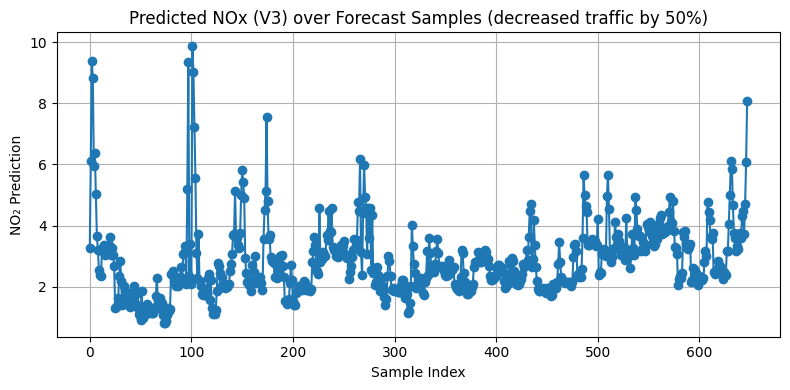

In [169]:
#Forecast with RF
preds_V7 = ET_best_model2.predict(data9)
print(preds_V7)

plt.figure(figsize=(8,4))
plt.plot(preds_V7, marker='o', linestyle='-')
plt.title("Predicted NOx (V3) over Forecast Samples (decreased traffic by 50%)")
plt.xlabel("Sample Index")
plt.ylabel("NO₂ Prediction")
plt.grid(True)
plt.tight_layout()
plt.show()

### Change in traffic

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 648 entries, 0 to 647
Data columns (total 15 columns):
 #   Column              Non-Null Count  Dtype  
---  ------              --------------  -----  
 0   Weekday             648 non-null    object 
 1   Hour                648 non-null    int64  
 2   Temp_dry            648 non-null    float64
 3   Humidity            648 non-null    int64  
 4   wind_speed          648 non-null    float64
 5   Pressure            648 non-null    float64
 6   visibility          648 non-null    int64  
 7   Wind_dir            648 non-null    int64  
 8   Traffic east        648 non-null    float64
 9   Traffic north-east  648 non-null    float64
 10  Traffic south-east  648 non-null    float64
 11  Traffic Hvidovre    648 non-null    float64
 12  Traffic north-west  648 non-null    float64
 13  Traffic south-west  648 non-null    float64
 14  Traffic west        648 non-null    float64
dtypes: float64(10), int64(4), object(1)
memory usage: 76.1+ K

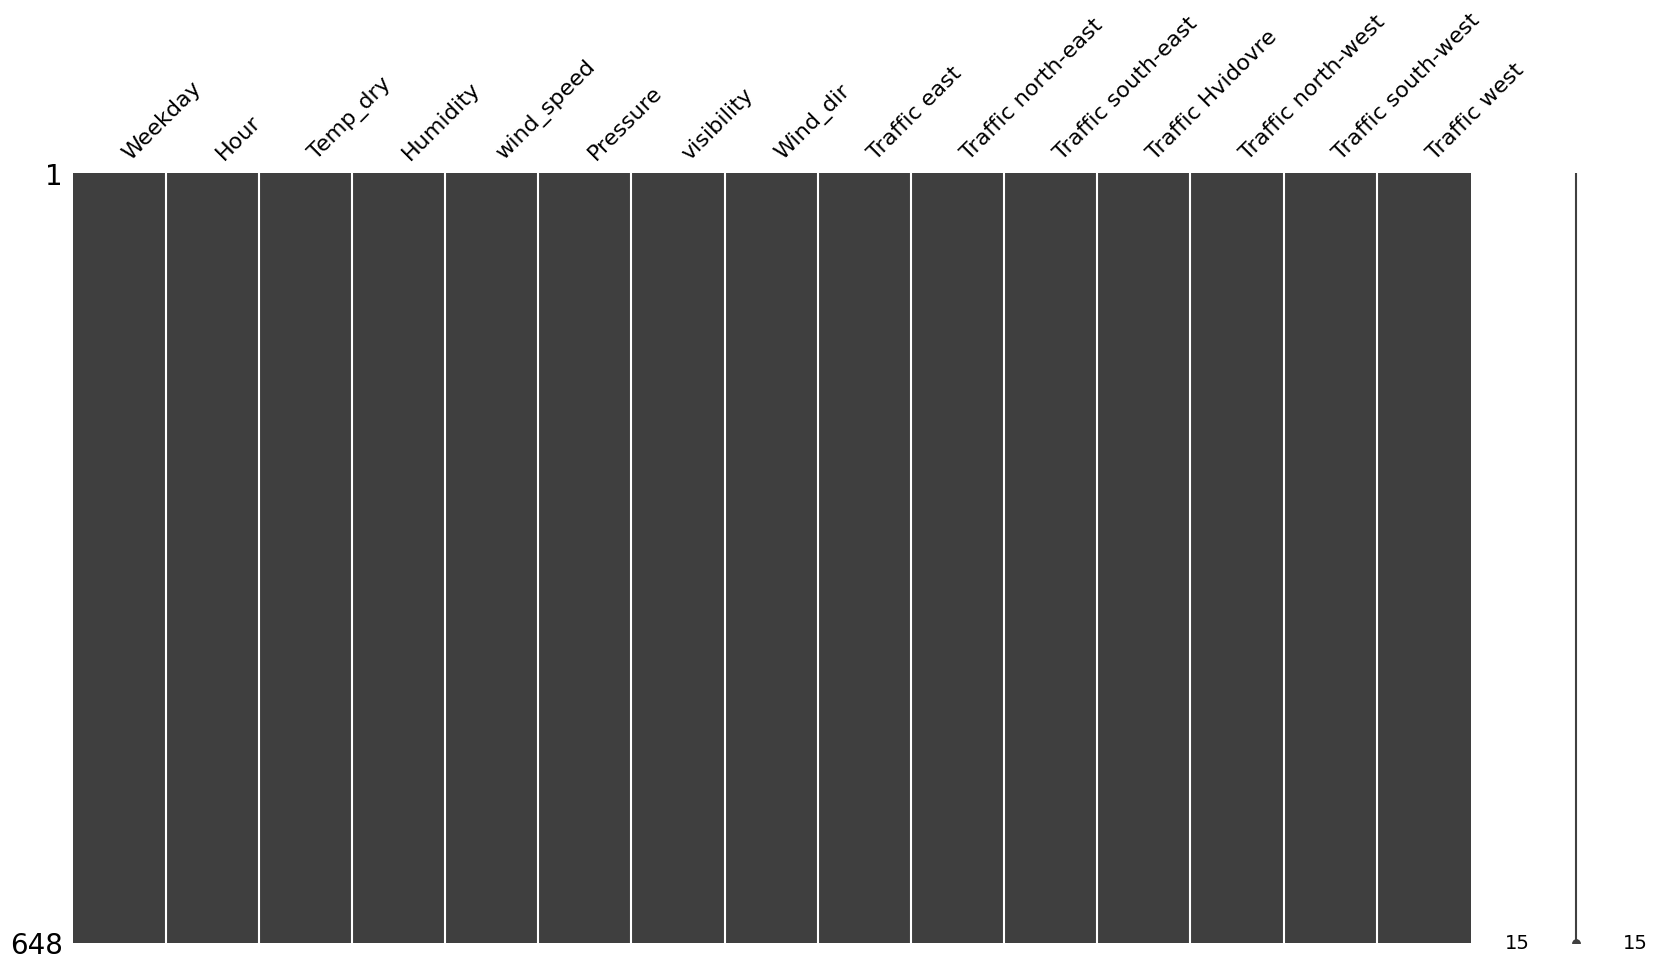

Data after dropping rows with missing values:
Weekday               0
Hour                  0
Temp_dry              0
Humidity              0
wind_speed            0
Pressure              0
visibility            0
Wind_dir              0
Traffic east          0
Traffic north-east    0
Traffic south-east    0
Traffic Hvidovre      0
Traffic north-west    0
Traffic south-west    0
Traffic west          0
dtype: int64
   Temp_dry  Humidity  wind_speed  Pressure  visibility  Traffic east  \
0      13.0        72         6.1    1021.5       26540      3.391251   
1      12.2        78         4.0    1021.9       21420      2.543438   
2      11.8        71         1.4    1021.9       12680      2.543438   
3      11.4        65         1.1    1022.1        4420      1.695626   
4      11.0        71         2.5    1021.9        1440      0.000000   

   Traffic north-east  Traffic south-east  Traffic Hvidovre  \
0            0.847813            1.271719          2.543438   
1            0.0

C:\Users\Jonas\AppData\Local\Temp\ipykernel_37516\1701182257.py:72: FutureWarning: A value is trying to be set on a copy of a DataFrame or Series through chained assignment using an inplace method.
The behavior will change in pandas 3.0. This inplace method will never work because the intermediate object on which we are setting values always behaves as a copy.

For example, when doing 'df[col].method(value, inplace=True)', try using 'df.method({col: value}, inplace=True)' or df[col] = df[col].method(value) instead, to perform the operation inplace on the original object.


  data10['Temp_dry'].fillna(data10['Temp_dry'].mean(), inplace=True)
C:\Users\Jonas\AppData\Local\Temp\ipykernel_37516\1701182257.py:73: FutureWarning: A value is trying to be set on a copy of a DataFrame or Series through chained assignment using an inplace method.
The behavior will change in pandas 3.0. This inplace method will never work because the intermediate object on which we are setting values always behaves

In [198]:
#DATA PREP
import pandas as pd
# Load the data
data10 = pd.read_excel('../Combined data/Forecast May 2025.xlsx')

data10 = data10.iloc[:, :9].join(data10[['Celle 11', 'Celle 12', 'Celle 16', 'Celle 17', 'Celle 18', 'Celle 22', 'Celle 23']])

# Remove the date column
data10.drop(columns=['Date'], inplace=True)

# Rename columns to their relative position
data10.rename(columns={'Celle 11': 'Traffic east', 'Celle 12': 'Traffic north-east', 'Celle 18': 'Traffic north-west',
                     'Celle 17': 'Traffic Hvidovre', 'Celle 23': 'Traffic west', 'Celle 22': 'Traffic south-west',
                     'Celle 16': 'Traffic south-east'}, inplace=True)

zones_to_halve = [
    'Traffic south-east'    
]
data10[zones_to_halve] = data10[zones_to_halve] * 0.5

# Get the structure of the data
print(data10.info())

# convert the 'Weekday' and 'Hour' Column to be categorical
data10['Weekday'] = data10['Weekday'].astype('category')
data10['Hour'] = data10['Hour'].astype('category')

print(data10.head())

# Ensure the 'Wind_dir' column is numeric before categorization
data10['Wind_dir'] = pd.to_numeric(data10['Wind_dir'], errors='coerce')
# Partition the wind_dir into 8 categories
def categorize_wind_dir(wind_dir):
    if wind_dir < 22.5 or wind_dir >= 337.5:
        return 'N'
    elif 22.5 <= wind_dir < 67.5:
        return 'NE'
    elif 67.5 <= wind_dir < 112.5:
        return 'E'
    elif 112.5 <= wind_dir < 157.5:
        return 'SE'
    elif 157.5 <= wind_dir < 202.5:
        return 'S'
    elif 202.5 <= wind_dir < 247.5:
        return 'SW'
    elif 247.5 <= wind_dir < 292.5:
        return 'W'
    else:
        return 'NW'

# Apply the function to the 'Wind_dir' column
data10['Wind_dir'] = data10['Wind_dir'].apply(categorize_wind_dir)

# Convert the 'Wind_dir' column to categorical
data10['Wind_dir'] = data10['Wind_dir'].astype('category')


#MISSING DATA
# Count rows with missing values
missing_values_count = data10.isnull().sum()
print("Missing values count in each column:")
print(missing_values_count)

# Visualize the missing data
import missingno as msno
import matplotlib.pyplot as plt

msno.matrix(data10, figsize=(20, 10))
plt.show()

# Impute the mean for missing values of numerical columns (the following code can be optimized)
data10['Temp_dry'].fillna(data10['Temp_dry'].mean(), inplace=True)
data10['wind_speed'].fillna(data10['wind_speed'].mean(), inplace=True)
data10['Pressure'].fillna(data10['Pressure'].mean(), inplace=True)
data10['visibility'].fillna(data10['visibility'].mean(), inplace=True)
data10['Humidity'].fillna(data10['Humidity'].mean(), inplace=True)
#data.dropna(inplace=True)

missing_values_count = data10.isnull().sum()
print("Data after dropping rows with missing values:")
print(missing_values_count)

# Transform the categorical variables into dummy variables
data10 = pd.get_dummies(data10, drop_first=True)
print(data10.head())

[3.29147541 6.07847159 9.59977214 8.97136764 6.07089177 6.17183172
 4.77629482 3.72261844 3.21093967 2.66219333 2.51798526 2.50979198
 3.19678208 3.23100204 3.38892517 3.05954225 3.31562526 3.17478805
 3.21998031 3.30642957 3.62926805 3.07374722 3.28324066 3.08830151
 2.72272336 1.33237622 1.36836766 1.38479044 1.60466712 2.33696579
 2.71624958 2.2000849  1.44071118 1.42255184 1.96110149 1.83405382
 1.77367311 1.6467341  1.61529519 1.39455803 1.3299885  1.62387094
 1.73839588 1.85530002 2.0117896  1.46582663 1.30336219 1.79613386
 1.11937583 1.02920583 0.90891662 1.85767808 0.9692697  1.20918287
 1.23547479 1.09094783 1.43904633 1.24367009 1.24764974 1.20418068
 1.15056218 1.12964335 1.14774313 1.29121173 1.34023122 1.67545248
 2.29363445 1.56923458 1.58923593 1.64223269 1.30320859 1.49243332
 1.05181537 0.81597516 0.81242847 0.88054823 1.06620459 1.31109451
 1.19602911 1.27643421 2.3925893  2.41732579 2.53535645 2.25568218
 2.1417075  2.06169197 2.1041343  2.06730724 2.16760331 2.3201

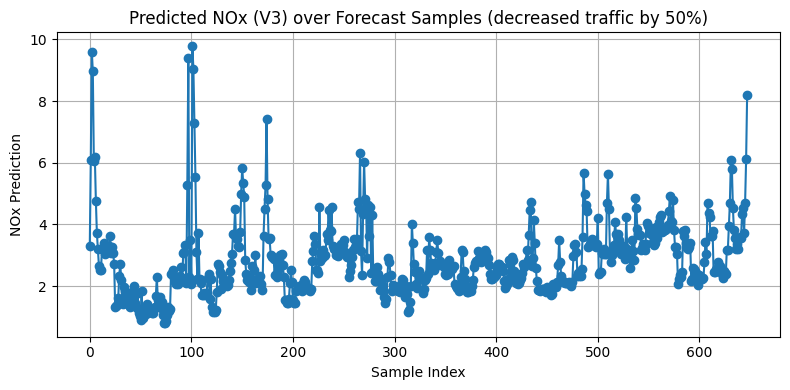

In [199]:
#Forecast with RF
preds_V8 = ET_best_model2.predict(data10)
print(preds_V8)

plt.figure(figsize=(8,4))
plt.plot(preds_V8, marker='o', linestyle='-')
plt.title("Predicted NOx (V3) over Forecast Samples (decreased traffic by 50%)")
plt.xlabel("Sample Index")
plt.ylabel("NOx Prediction")
plt.grid(True)
plt.tight_layout()
plt.show()

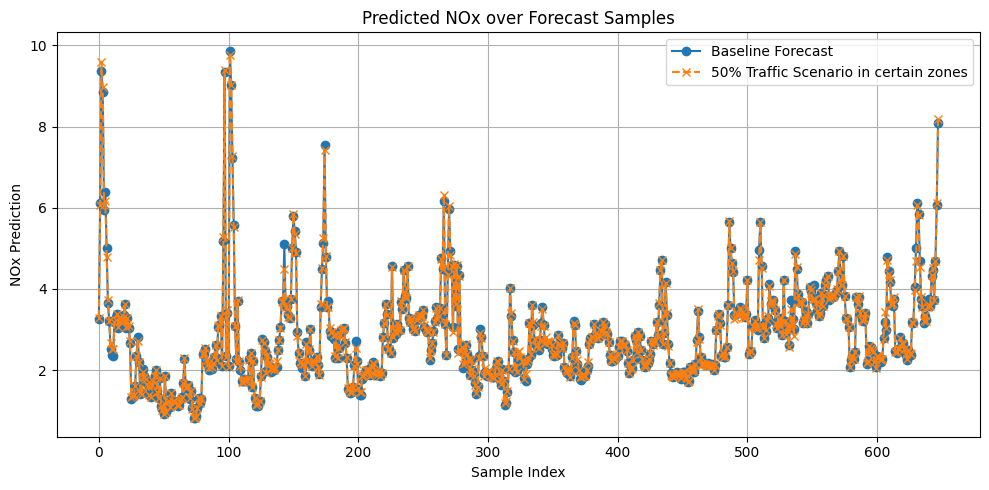

In [200]:
#Plotting both predictions on the same graph
import matplotlib.pyplot as plt

# Plotting V1 prediction with V4

plt.figure(figsize=(10,5))
plt.plot(preds_V7, marker='o', linestyle='-', label='Baseline Forecast')
plt.plot(preds_V8, marker='x', linestyle='--', label='50% Traffic Scenario in certain zones')

plt.title("Predicted NOx over Forecast Samples")
plt.xlabel("Sample Index")
plt.ylabel("NOx Prediction")
plt.grid(True)
plt.legend()             # <-- add legend for the two lines
plt.tight_layout()
plt.show()

In [201]:
#Table over the two predictions
import pandas as pd

# compute averages
avg_v7 = preds_V7.mean()
avg_v8 = preds_V8.mean()

# build a DataFrame
df_summary = pd.DataFrame({
    'Scenario': ['Baseline Forecast', '50% Traffic (in certain zones)'],
    'Average NOx': [avg_v7, avg_v8]
})

#Showing summary
df_summary

,Scenario,Average NOx
0,Baseline Forecast,2.829418
1,50% Traffic (in certain zones),2.830340
